In [2]:
from codebase import experiments
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["figure.figsize"] = (10, 8)
mpl.rcParams.update({'font.size': 20})

# Q Learning (QL) vs Double Q Learning (DQL) comparison results
In this Notebook we show the results obtained throughout our experiments where we compare QL with DQL.

# Left-right problem
First we show the results of the Left-Right problem as adapted from [Reinforcement Learning: An Introduction](https://d1wqtxts1xzle7.cloudfront.net/54674740/Reinforcement_Learning-with-cover-page-v2.pdf?Expires=1634817759&Signature=N7NHnTdXIiilRFpoi2Dqr2ryfL6oWRvUkZKtzJ8kB15WWRs0dLYrEm8SzXhbVMG~U4Rn55IpLVSNsIGwpsHT~X9psAcpphJnEA~mK9FrJiWW2wR5ftMl61UIOrXjcQBGV88hTH~pfg0WsqZd3Ay~qtb7laHyxvwli-oBTfygPoKbrRnk4-ZlNJFxcYKIrM5Db7kntmRs2hY6HdpeiD3i56T-XYpol61JajYsQqt8Ti06QPOHgRkXxdr7vJrQwjmfQ8NrEfRaSm2~pr5ZAZW0MY8Npq3ypZuUSildu3QsttHWclkdzdI-L2P0-~4PQVuRMw5QNRRsNkGCRJyXiWWH1Q__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA). ![title](img/mdp_rightleft.png)
## Main results
First we run the tests which show the main results. Afterwards we'll also run some additional experiments which can be found in the appendix.
### Default Left-Right problem
The first cell contains the basesline Left-Right experiment, where we use the baseline policy (where exploration $\epsilon$ the learning rate $\alpha$ are progressively lowered for a state action pair based on the visitation) and $\mu=-0.5$. The results have been averaged over 1000 runs. The first plot ratio of the left action being chosen for each episode for QL and DQL. Note that here the left action is actually the inferior action and that for each episode in each run the result is a binary choice: either left or right.
The second plot shows the average learned Q-value along with the standard deviation for going left from the first state. The true Q-value is equal to $\mu=-0.5$

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 101.80it/s]


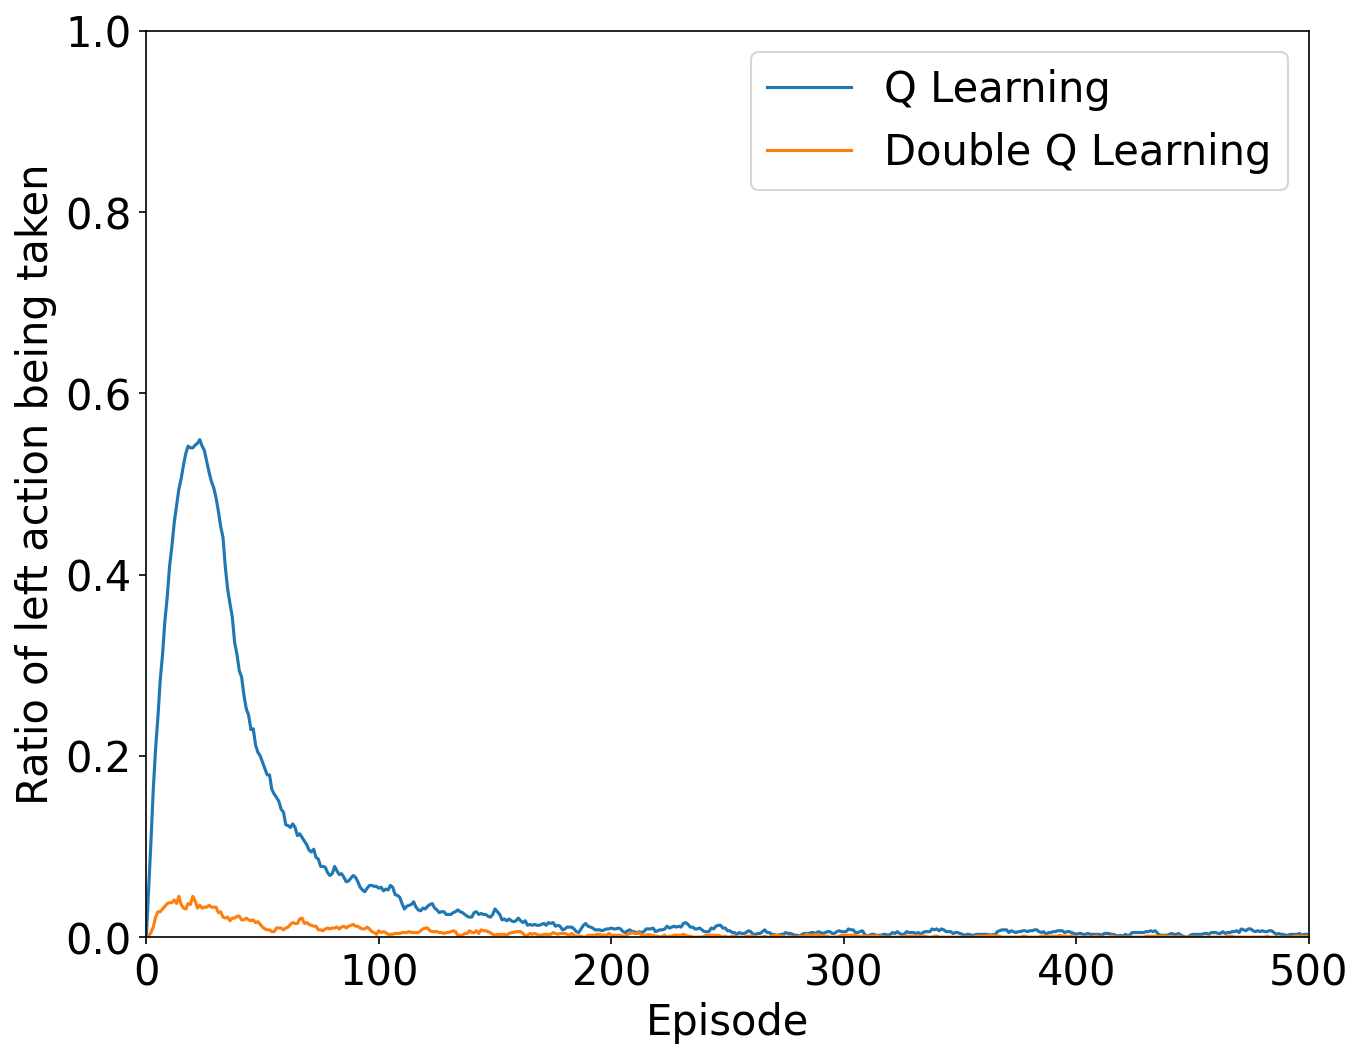

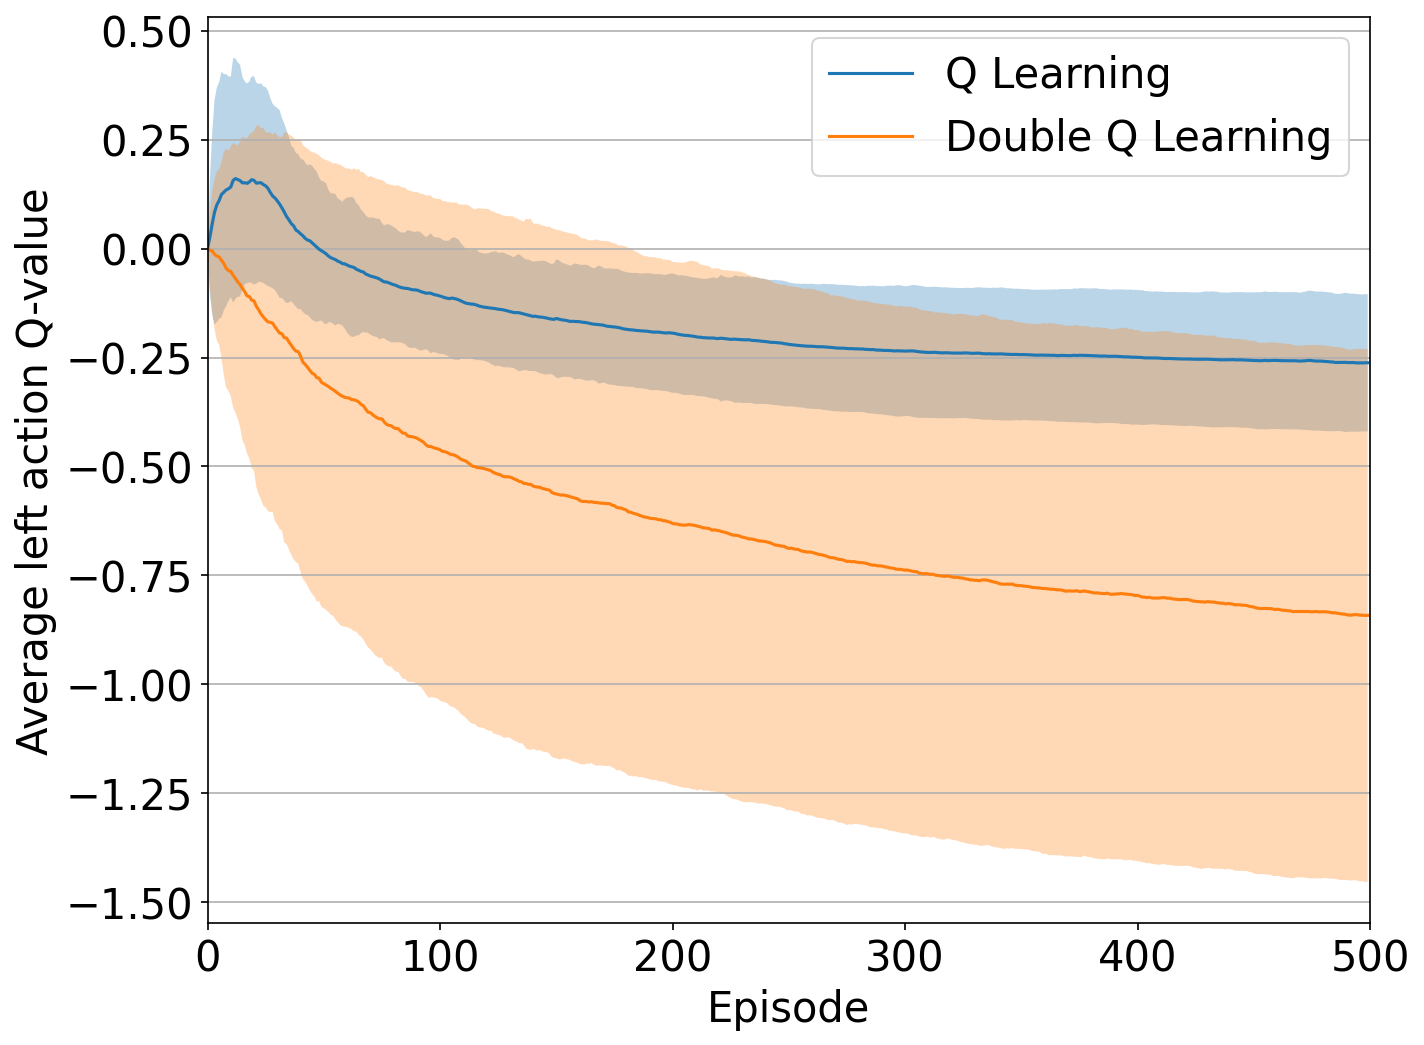

In [9]:
experiments.ratio_left_right(avg_Q=True)

### Reverse left-right
Additionally, we also test an altered version of the Left-Right problem where $\mu=0.5$. Here the left action is actually the preferred action to take. We show the results here using two policies, the baseline policy and the softmax policy. First the baseline:

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 88.88it/s]


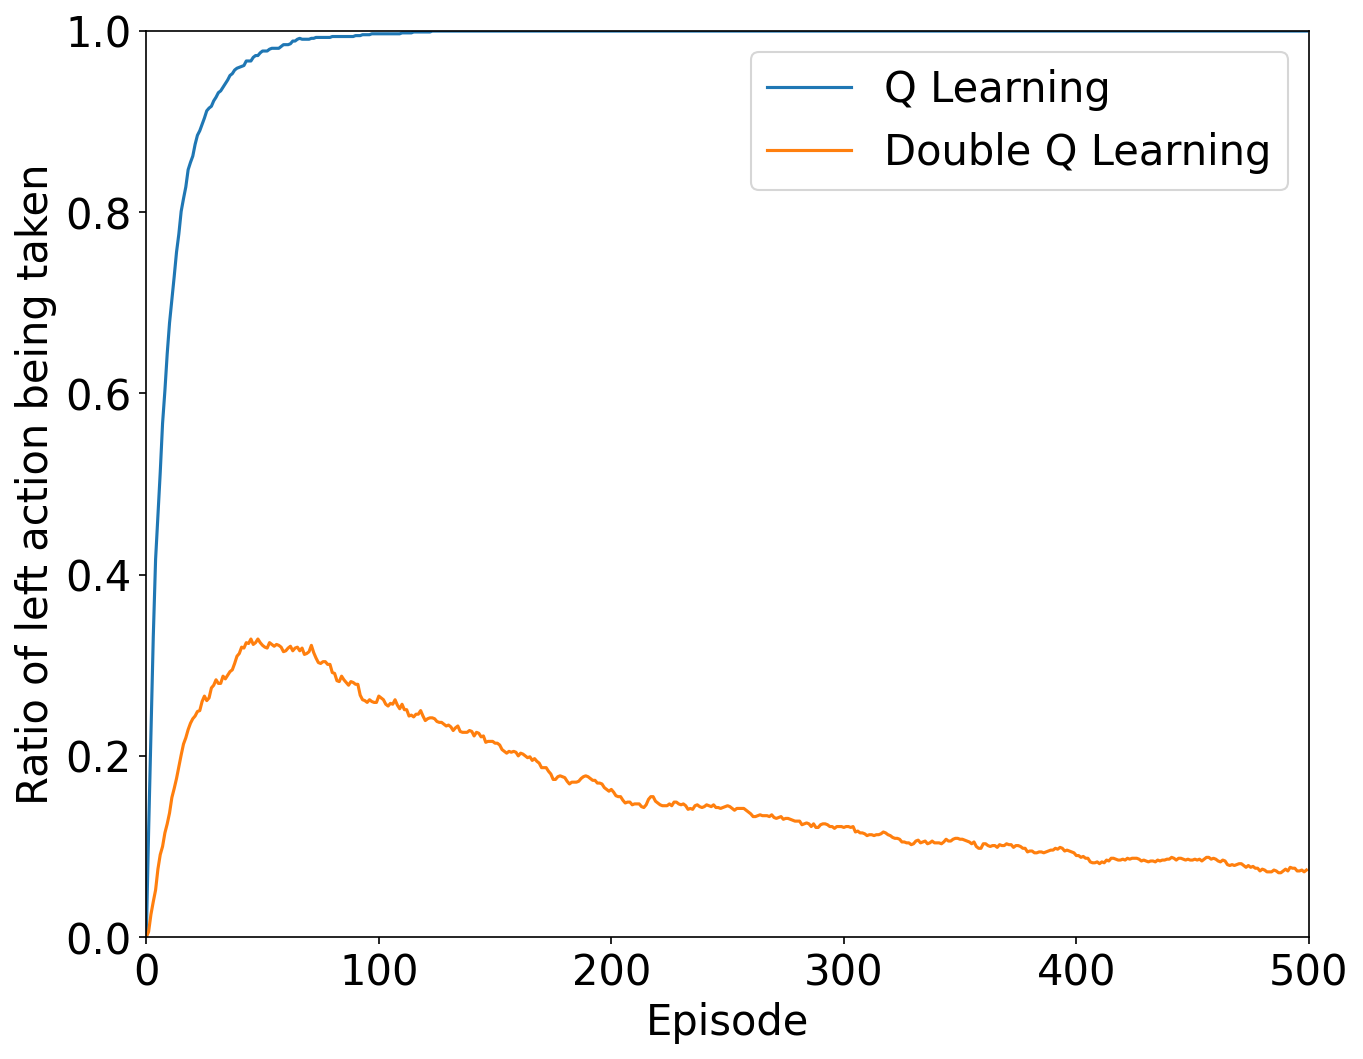

In [10]:
experiments.ratio_left_right(mu=0.5, policy_type='dynamic')

And the Softmax Policy

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.91it/s]


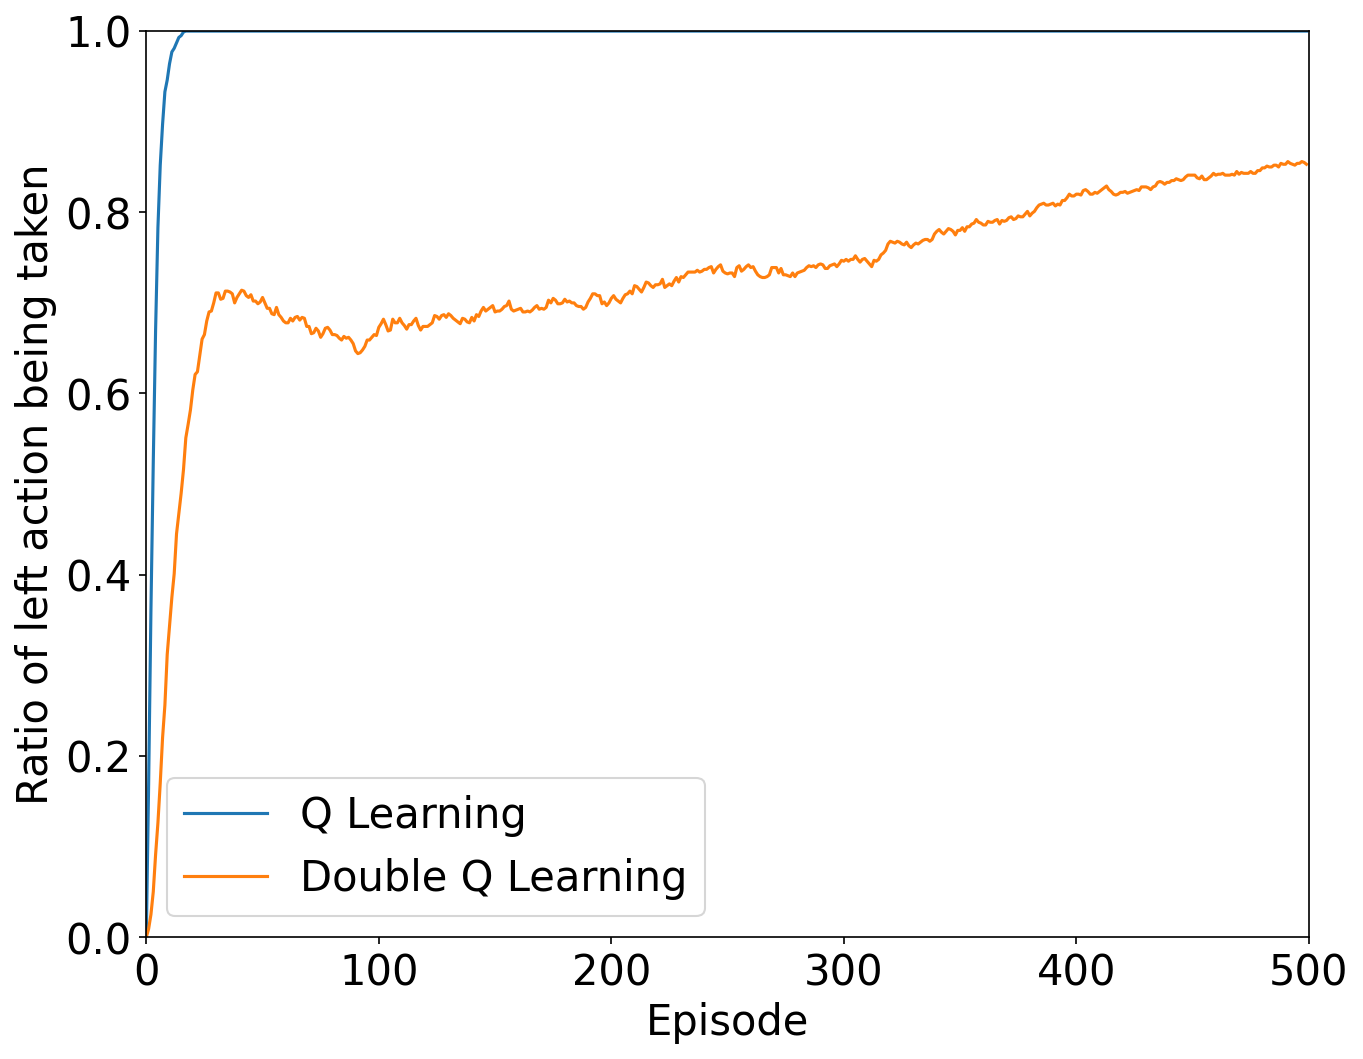

In [11]:
experiments.ratio_left_right(mu=0.5, policy_type="softmax")

# Appendix results
## Left-Right
In the appendix we also show the results for the regular Left-Right problem using an $\epsilon$-greedy policies with $\epsilon\in\{0.1, 0.5, 0.9\}$, and the Softmax Policy.

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.65it/s]


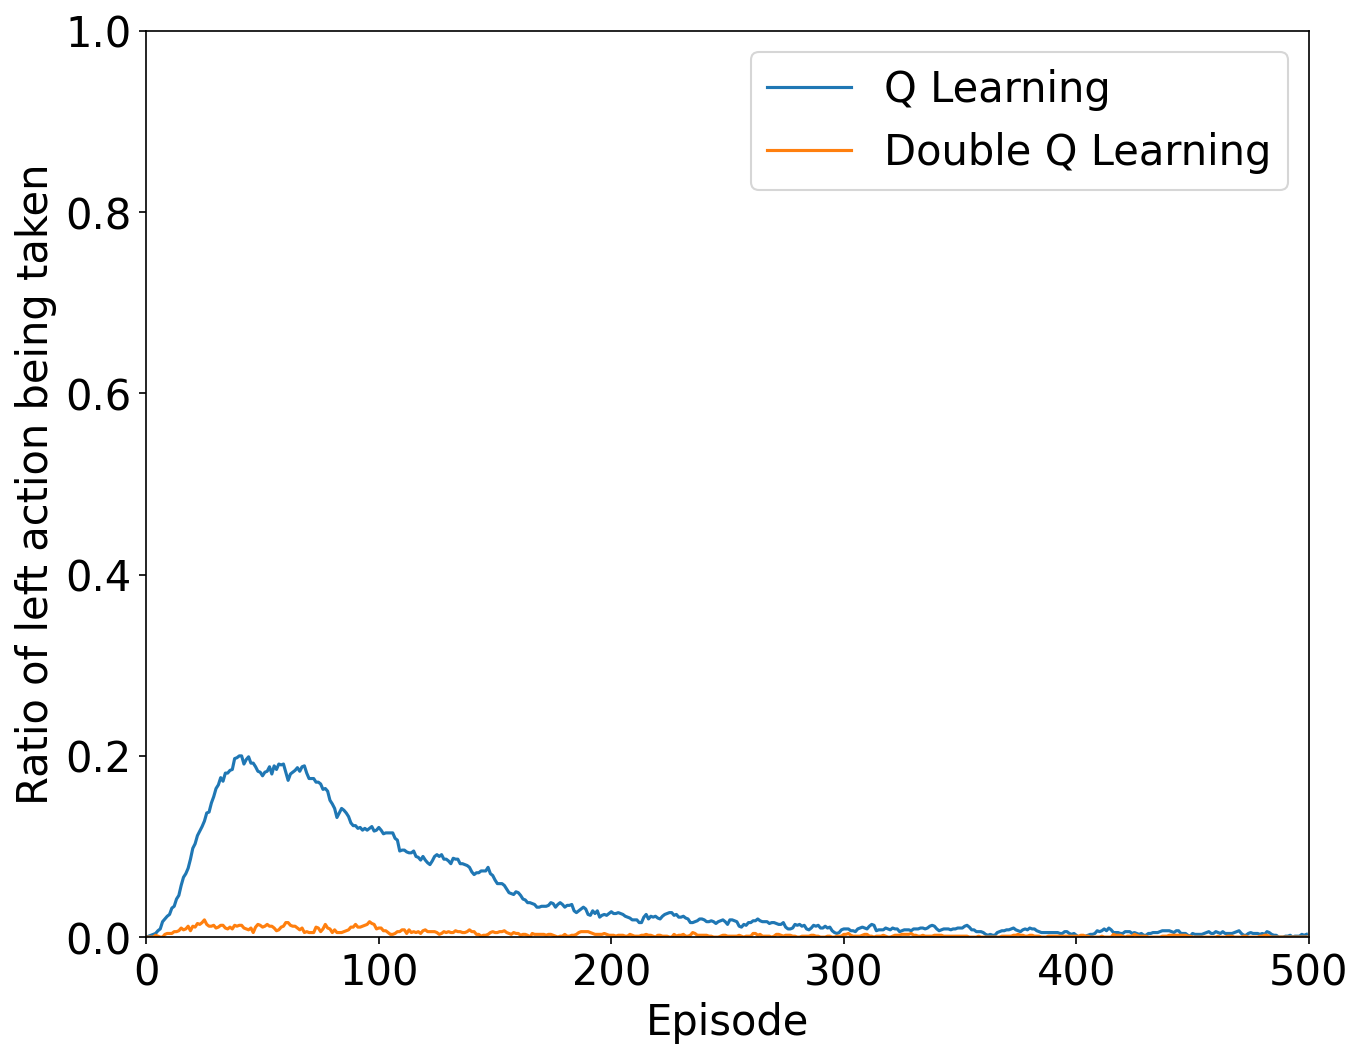

In [12]:
experiments.ratio_left_right(epsilon=0.1, policy_type="epsilon_greedy")

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 99.14it/s]


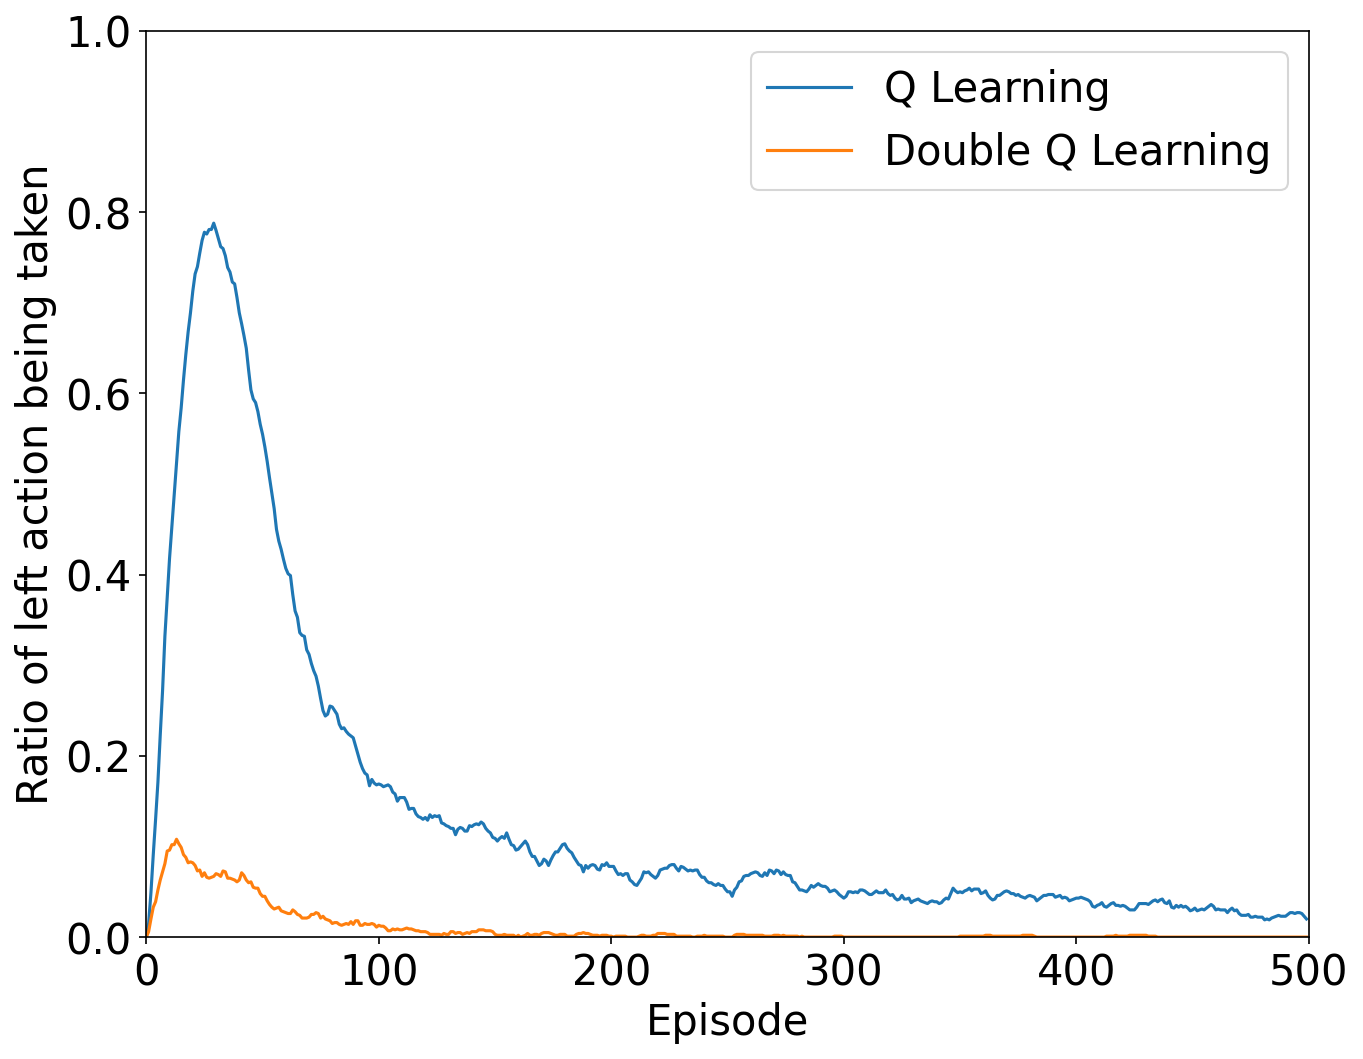

In [3]:
experiments.ratio_left_right(epsilon=0.5, policy_type="epsilon_greedy")

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.40it/s]


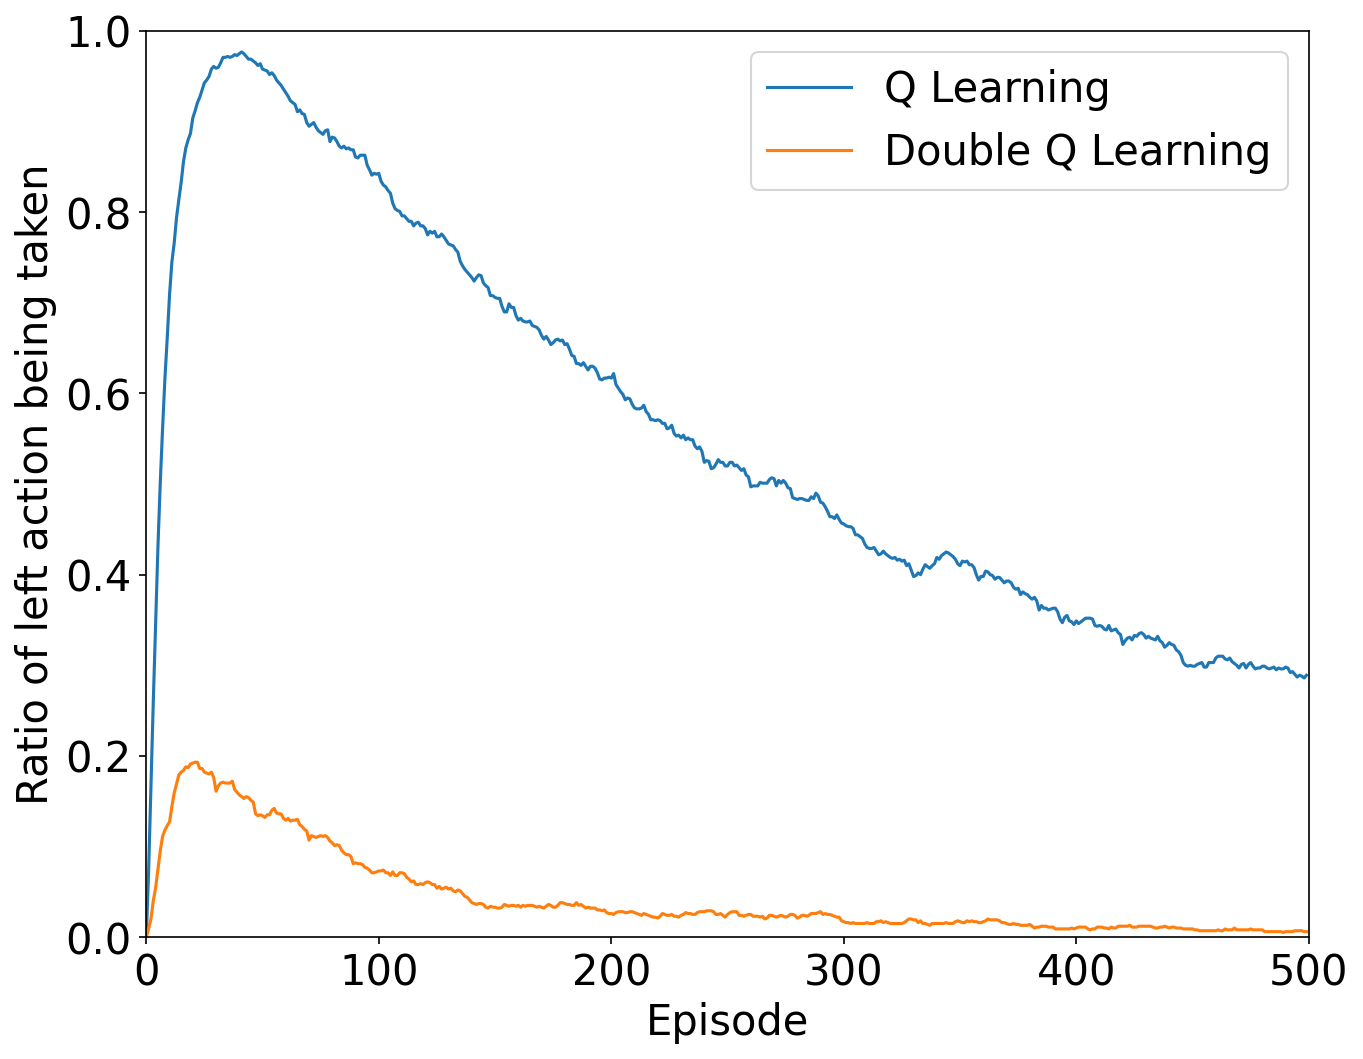

In [14]:
experiments.ratio_left_right(epsilon=0.9, policy_type="epsilon_greedy")

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 43.39it/s]


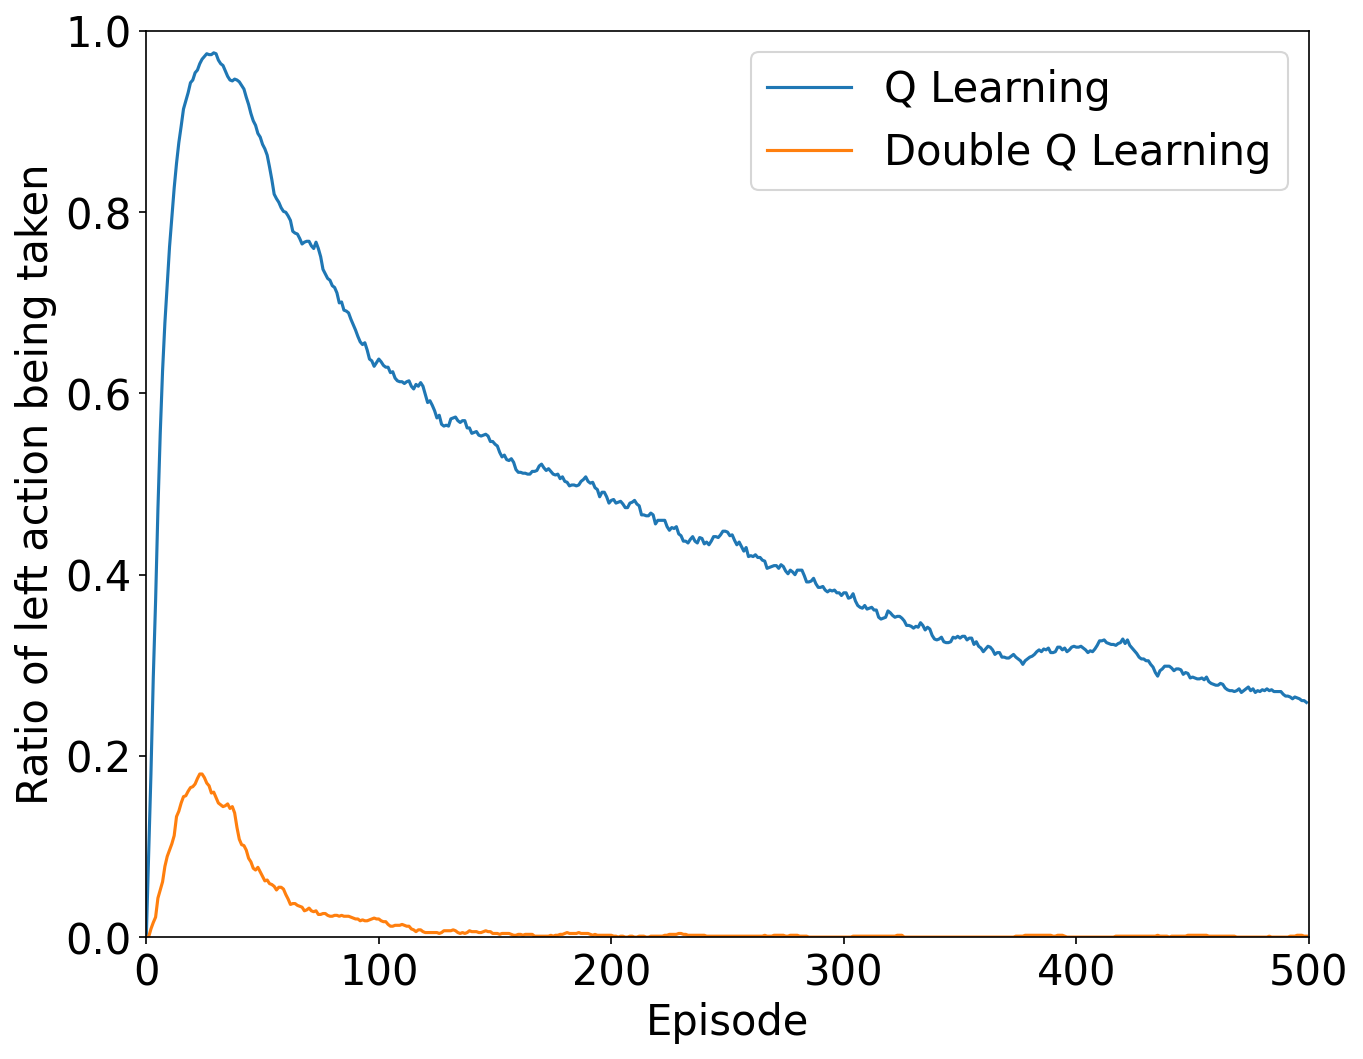

In [15]:
experiments.ratio_left_right(policy_type="softmax")

## Reverse Left-Right
And the results for the reverse Left-Right problem using the same $\epsilon$-greedy policies.

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [02:34<00:00,  1.62it/s]


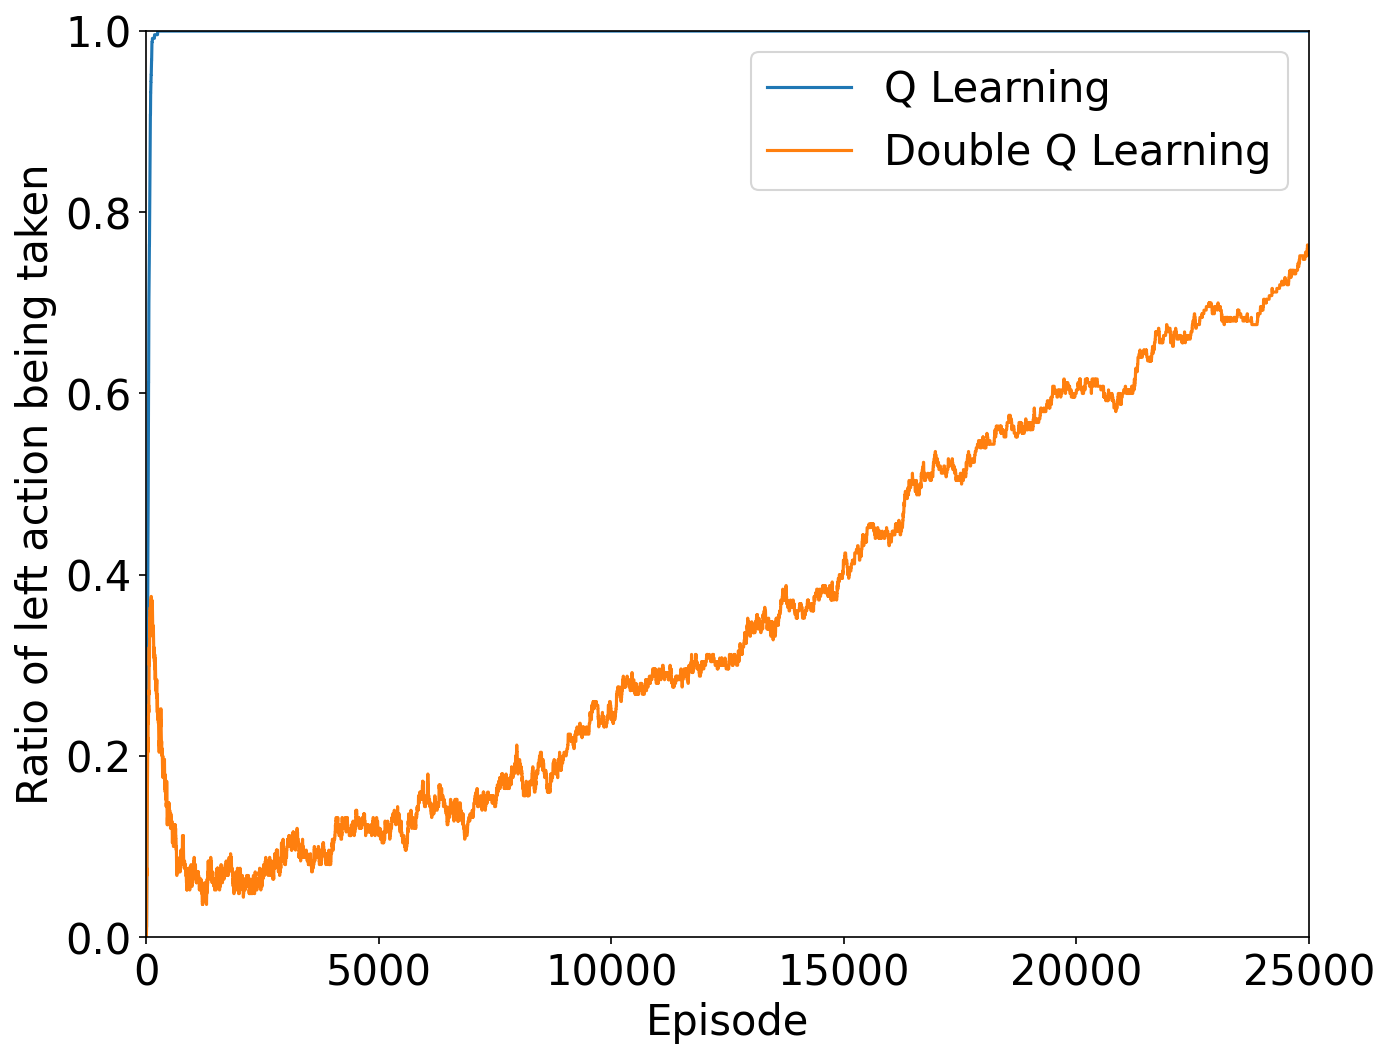

In [11]:
experiments.ratio_left_right(mu=0.5, epsilon=0.1, policy_type="epsilon_greedy", num_episodes=25000, num_iters=250)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.44it/s]


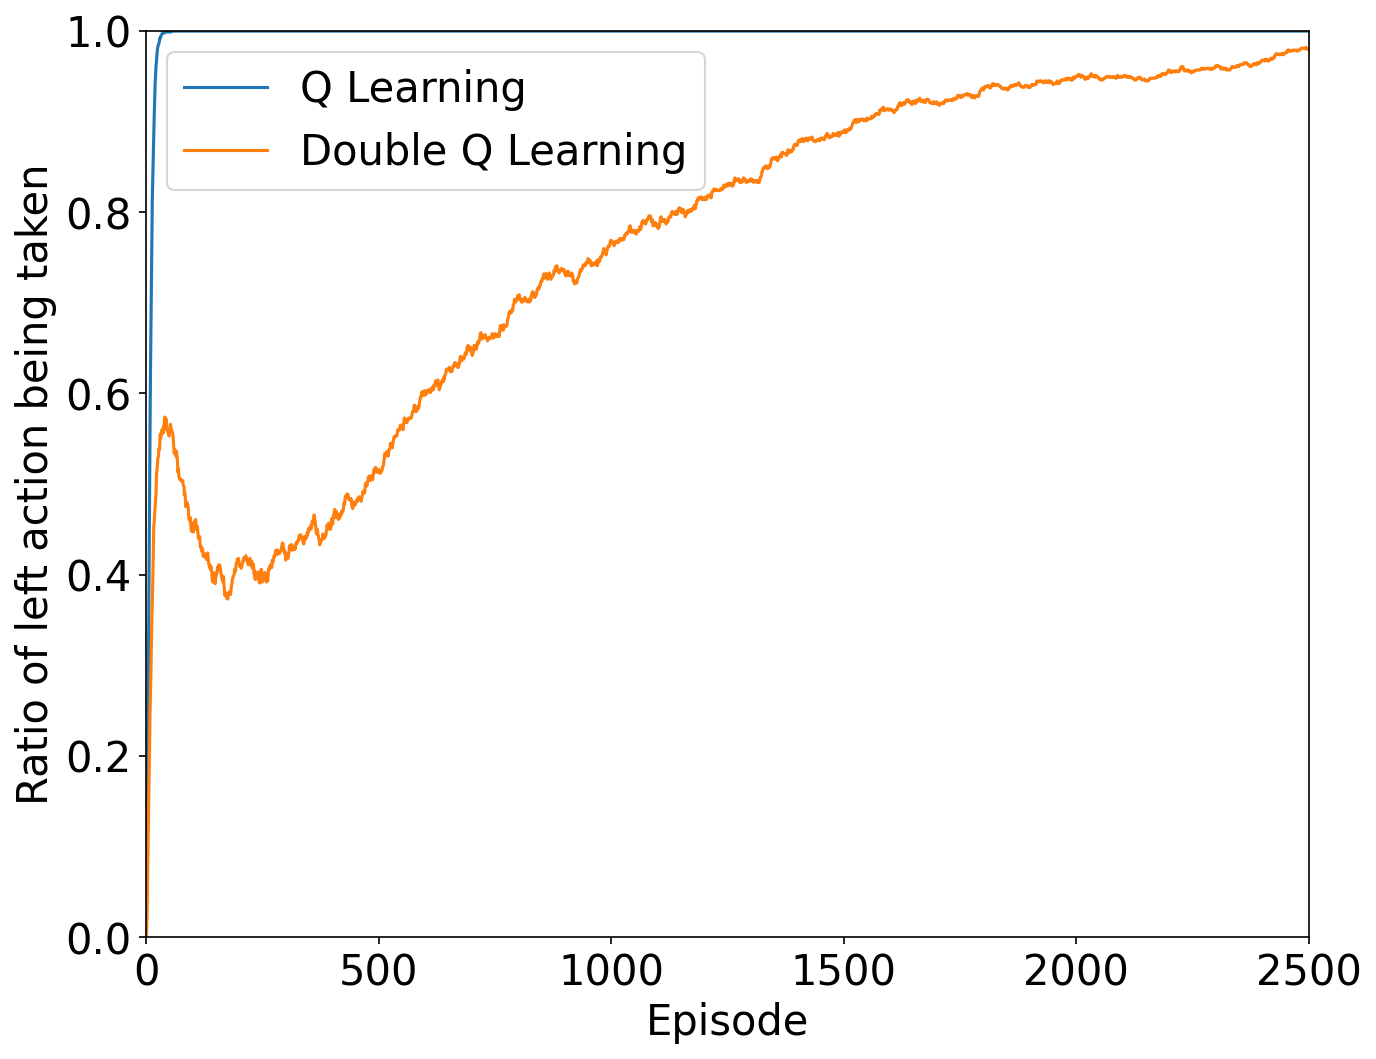

In [12]:
experiments.ratio_left_right(mu=0.5, epsilon=0.5, policy_type="epsilon_greedy", num_episodes=2500)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.01it/s]


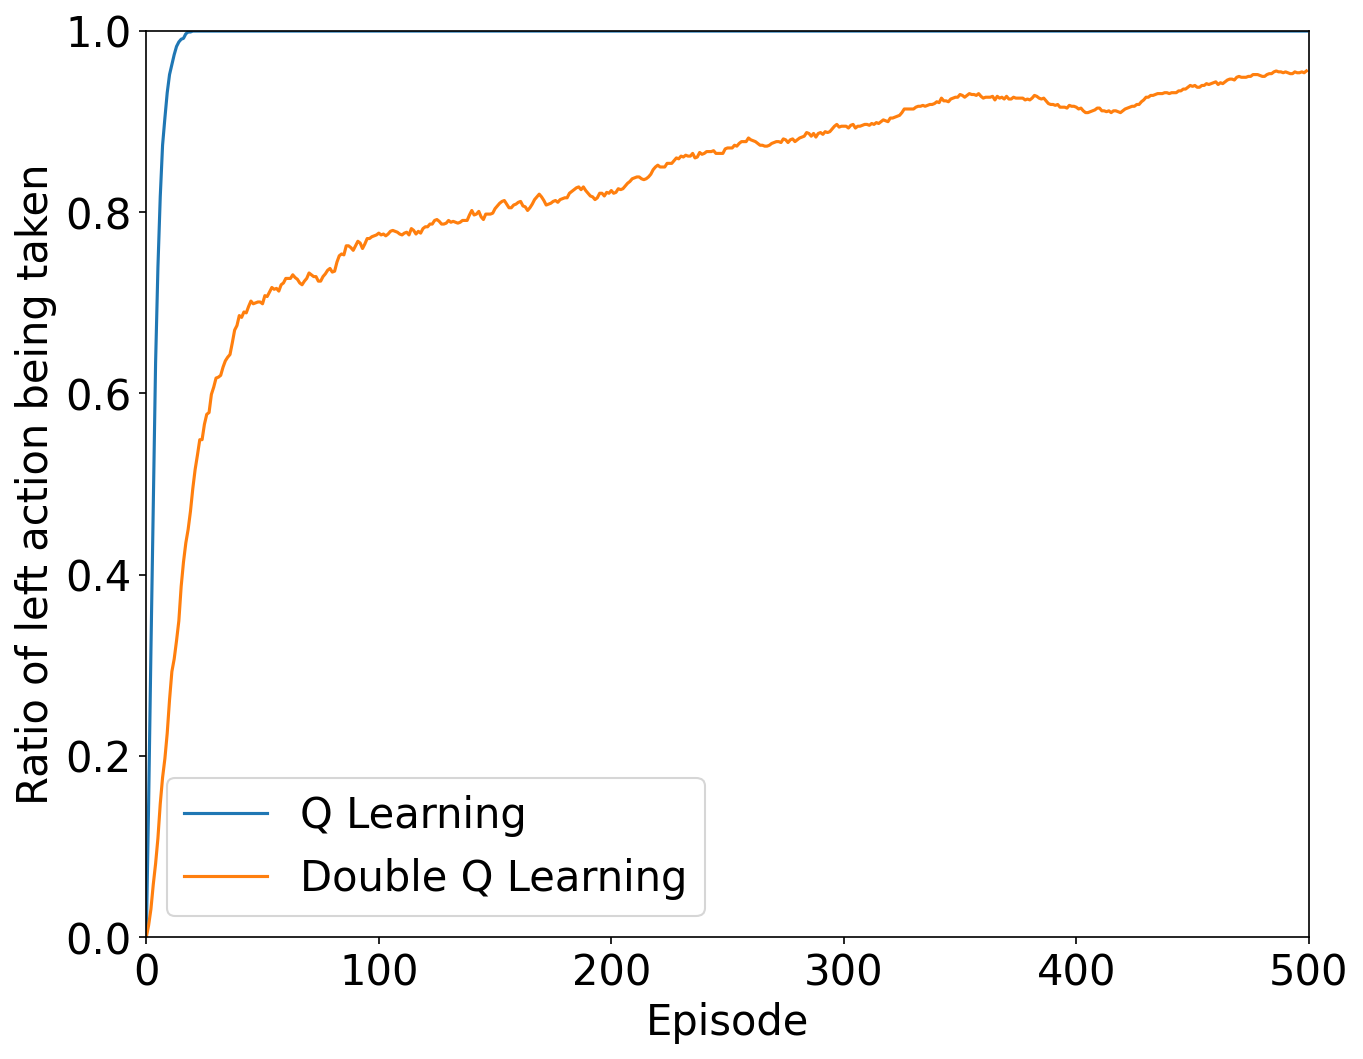

In [19]:
experiments.ratio_left_right(mu=0.5, epsilon=0.9, policy_type="epsilon_greedy")

# Behaviour tests (policy evaluation)
In this section we show the results of the policy evaluation, where we compare different behavior policies on both QL and DQL on the Left-Right gridworld environment. All these results are averaged over 100 runs.
## Overview of DQL and QL performance using different policies
First of all, we plot average the episode lengths with standard deviation on the behavior policy (so the obtained results during learning) for the baseline, $\epsilon=0.1$-greedy, and Softmax policies (we do not show the results on higher $\epsilon$ values, since by definition these explore a lot during learning which makes these results very poor). Additionally we also show the average episode reward with standard deviation evaluated on the greedy target policy using the learned Q-values.

The first two plots show the results obtained on QL, and the last two plots the results obtained on DQL.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:09<00:00,  3.70s/it]


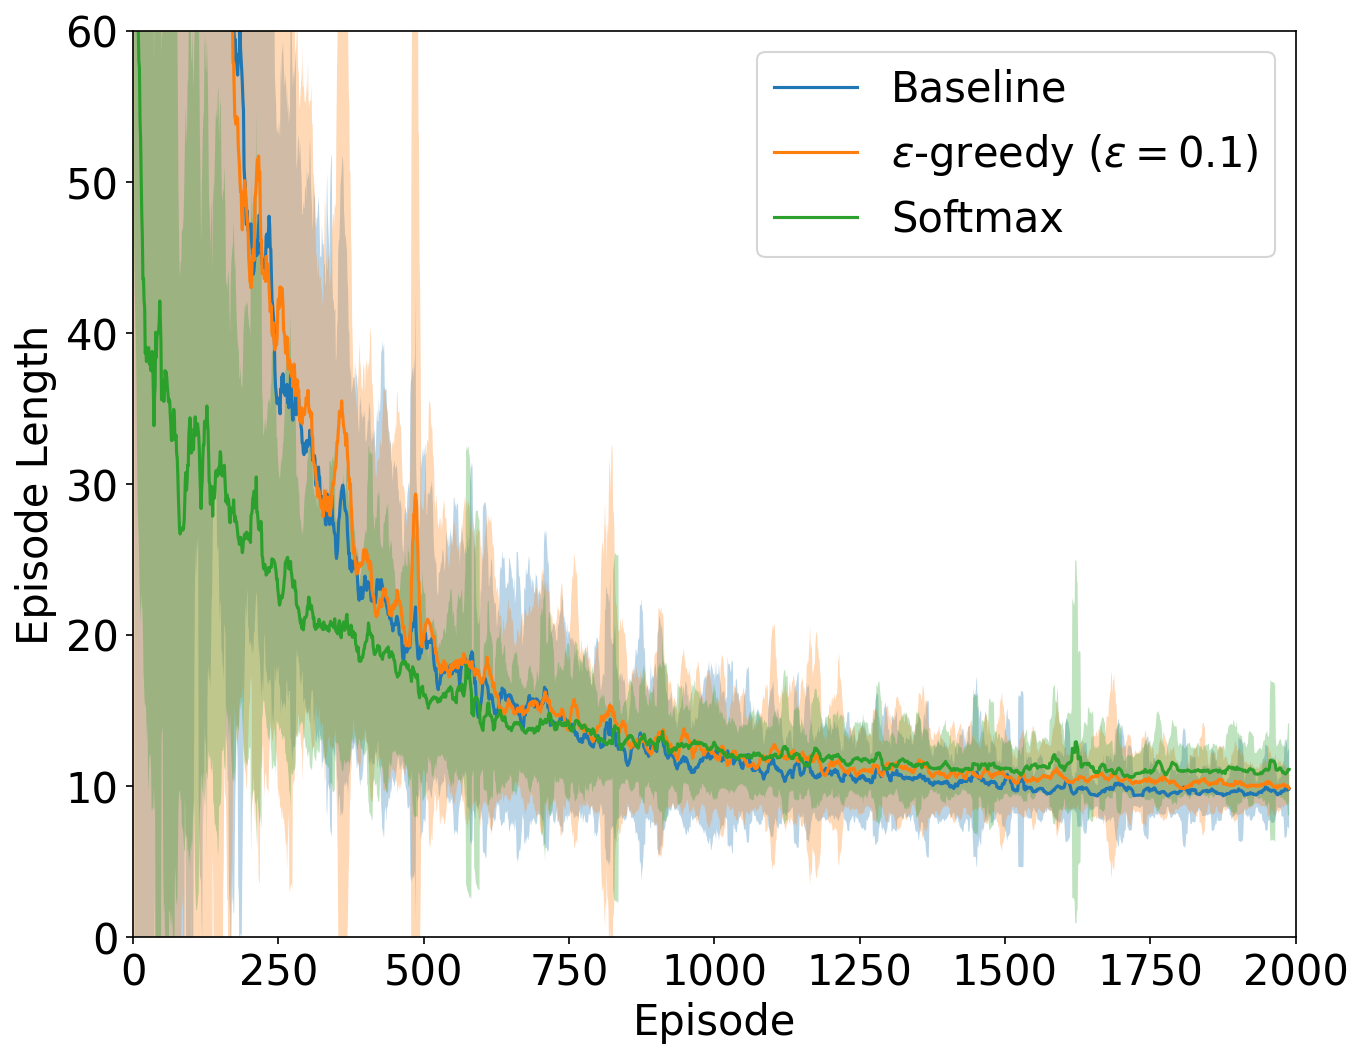

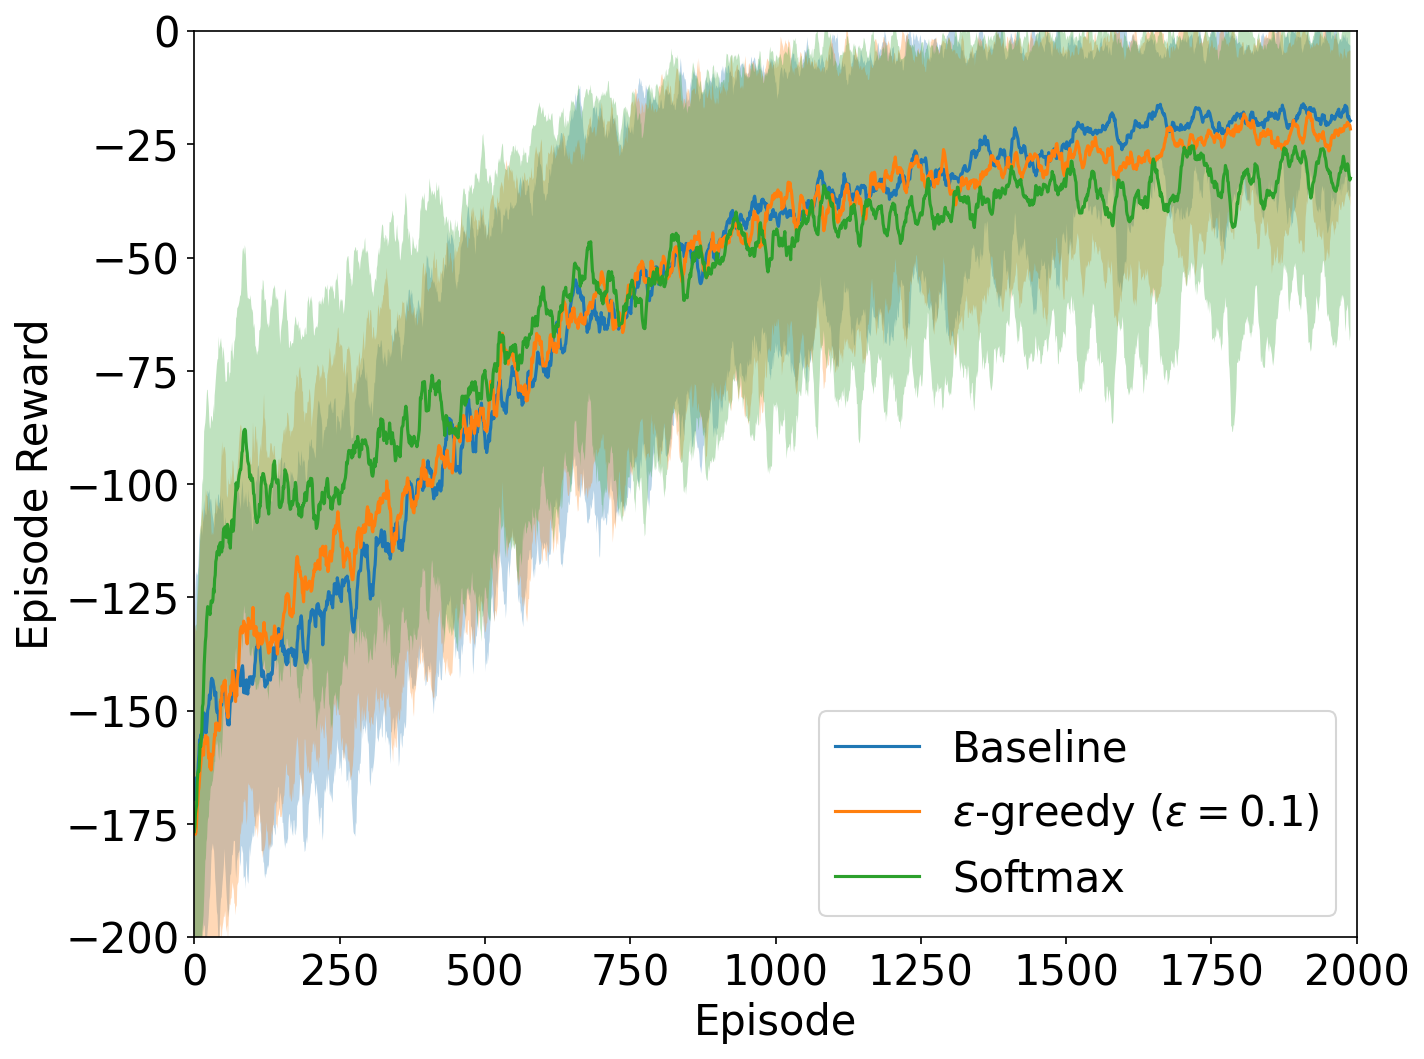

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:40<00:00,  2.21s/it]


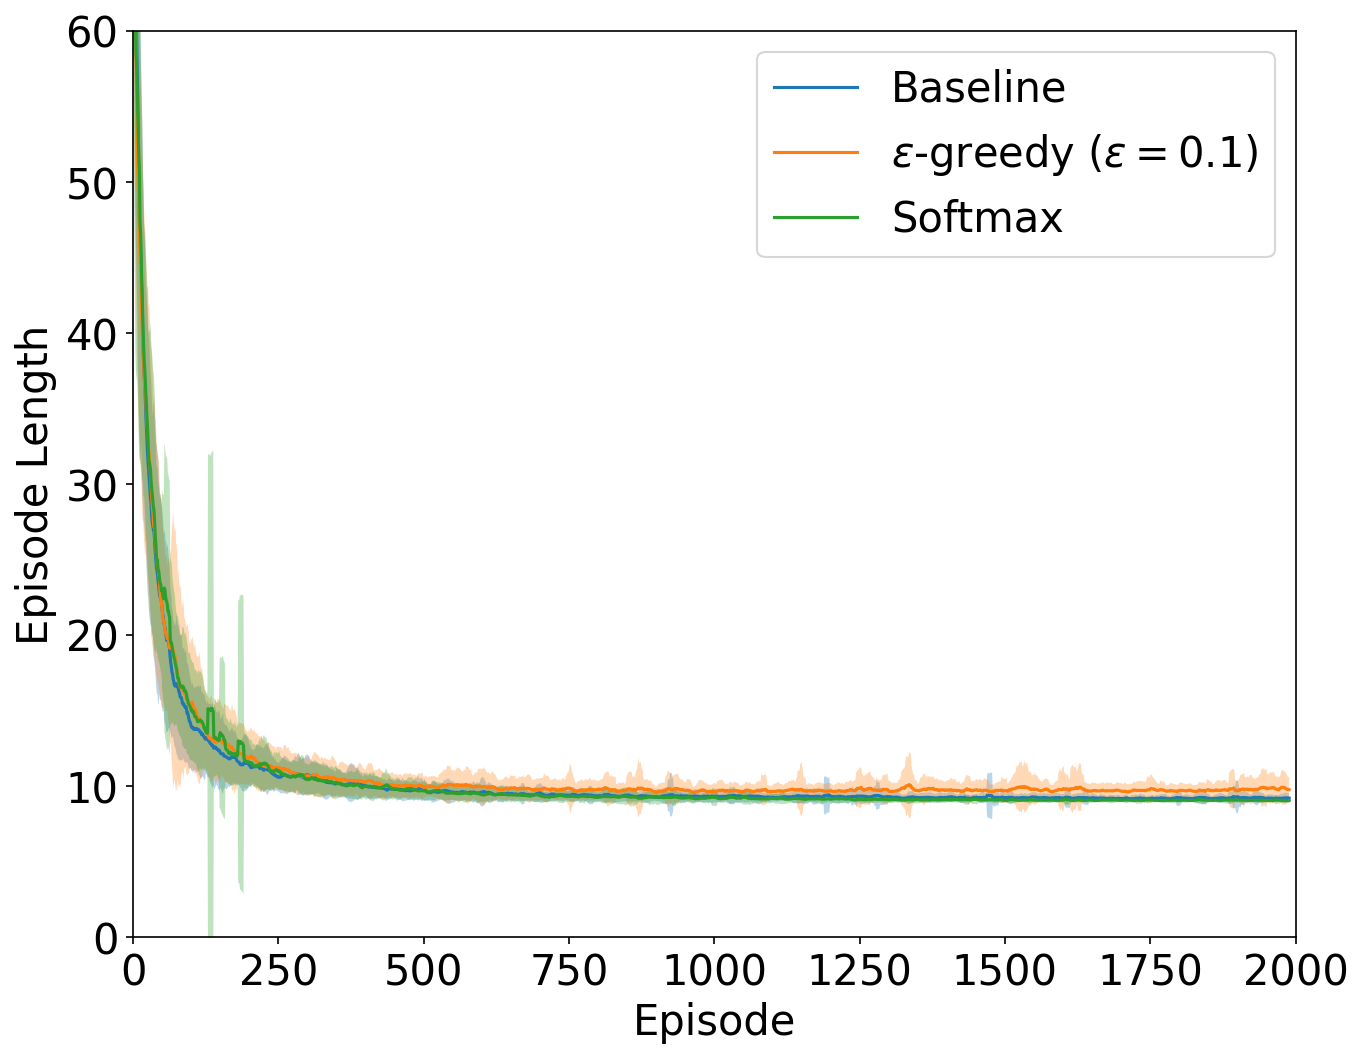

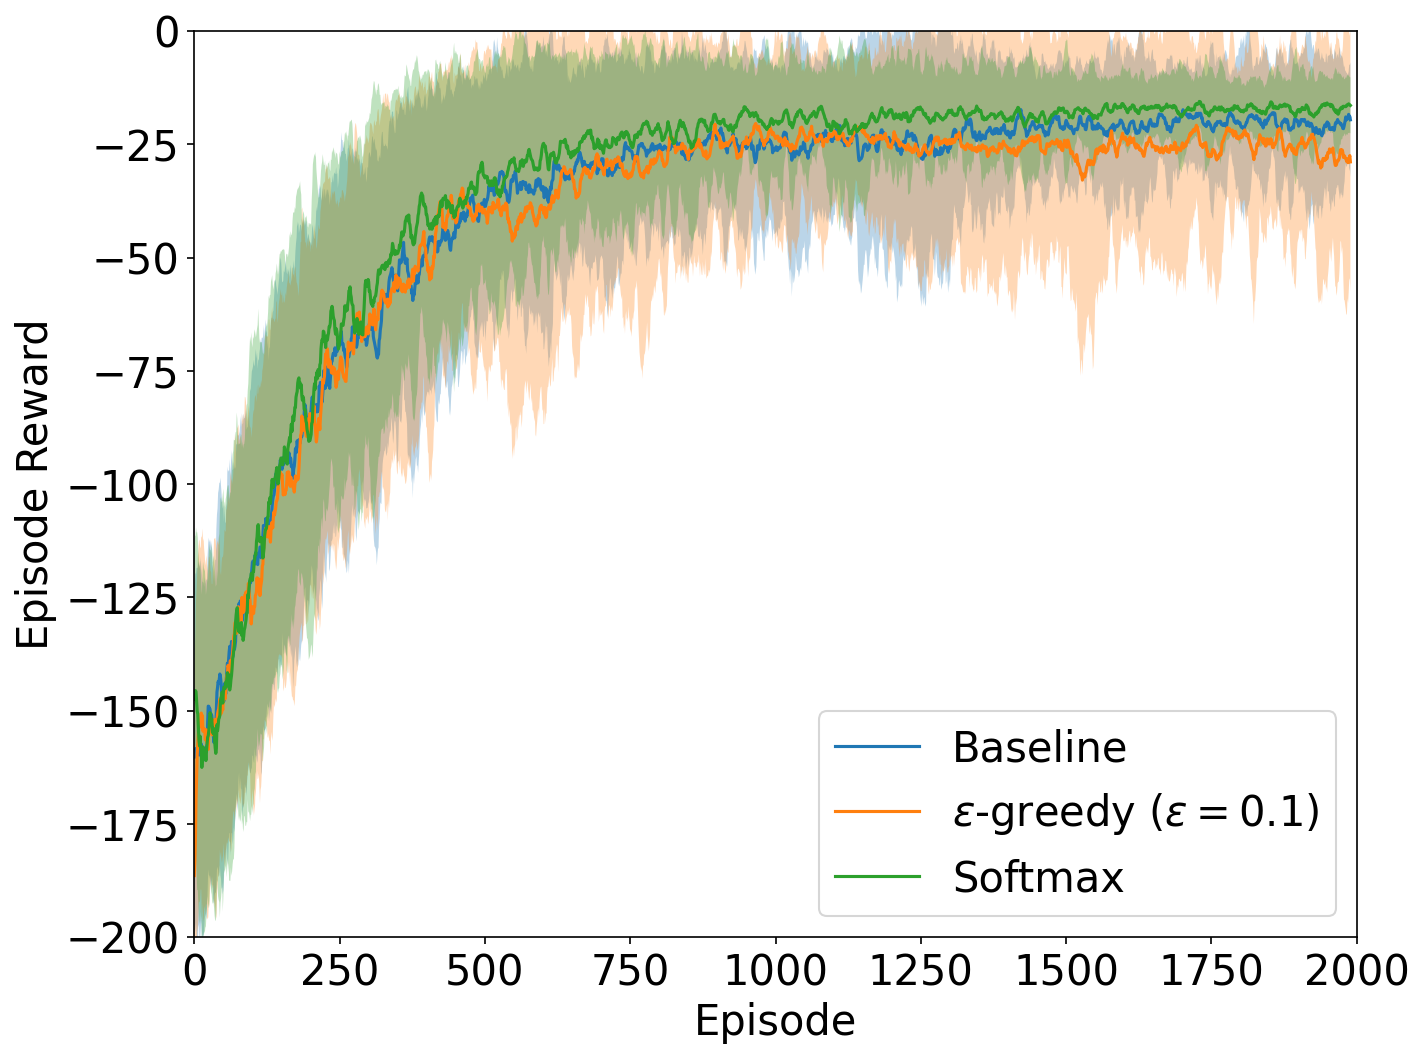

In [3]:
experiments.gridworld_behavior_test()

## Performance on DQL and QL using varying policies
We also compare DQL and QL directly with eachother using a fixed behavior policy. Again we plot the episode length with STD (as evaluated on the behavior policy) and the average episode reward with STD evaluated on the greedy target policy.
### Baseline policy
First we show the results using the baseline policy.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:00<00:00,  1.81s/it]


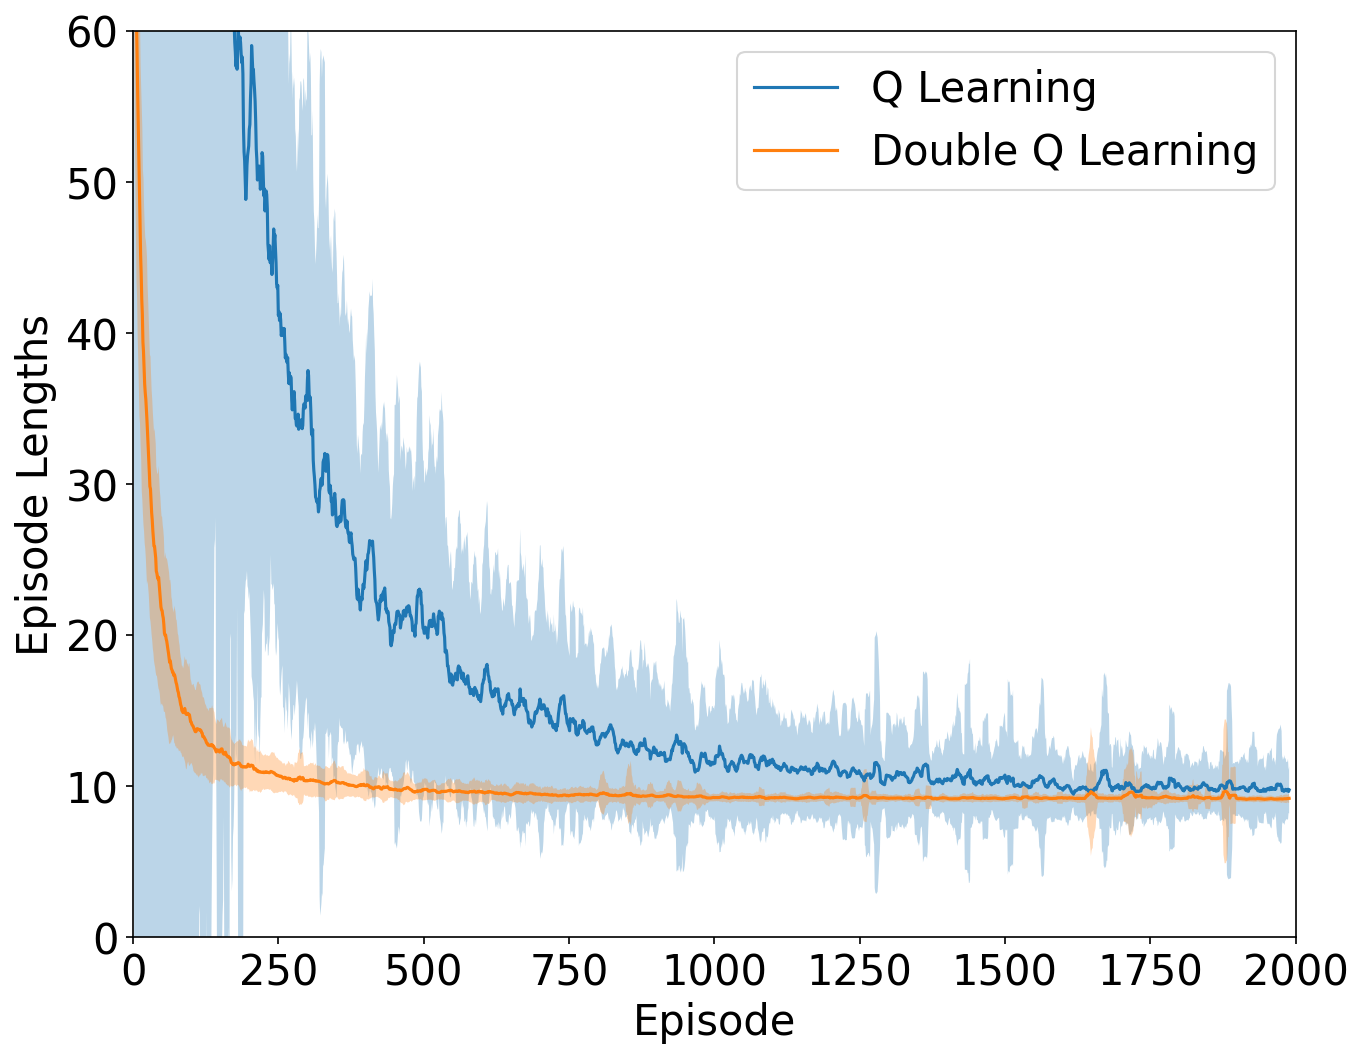

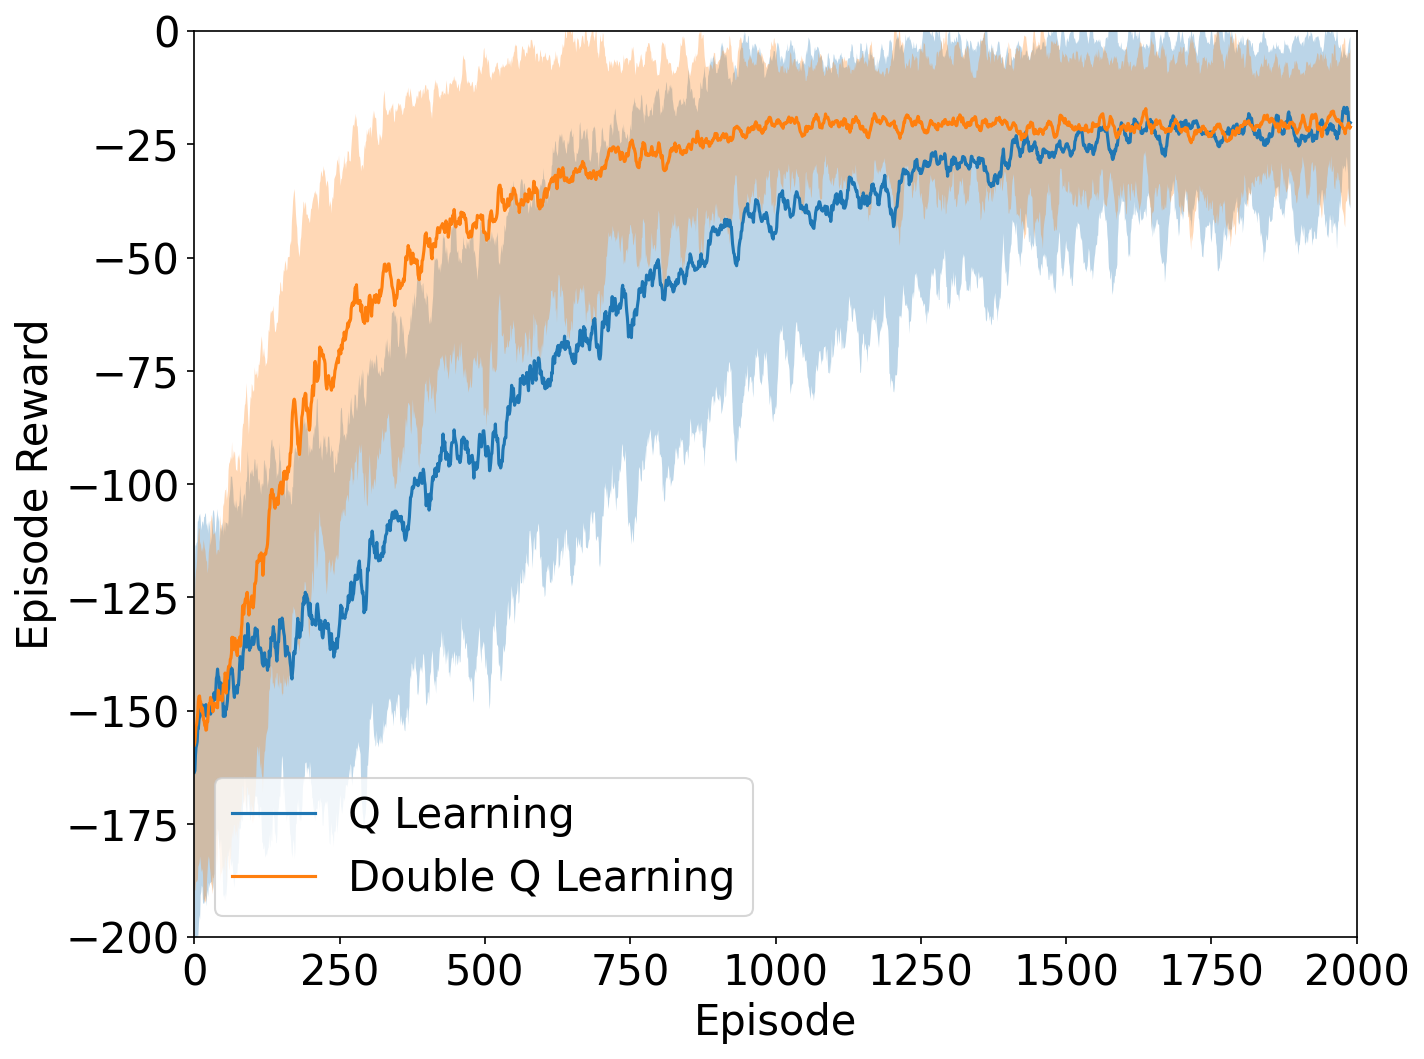

In [20]:
experiments.gridworld_test()

### $\epsilon$-greedy Policy with varying values for $\epsilon$
And for $\epsilon$-greedy with $\epsilon \in \{-.1, 0.5, 0.9\}

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:03<00:00,  1.84s/it]


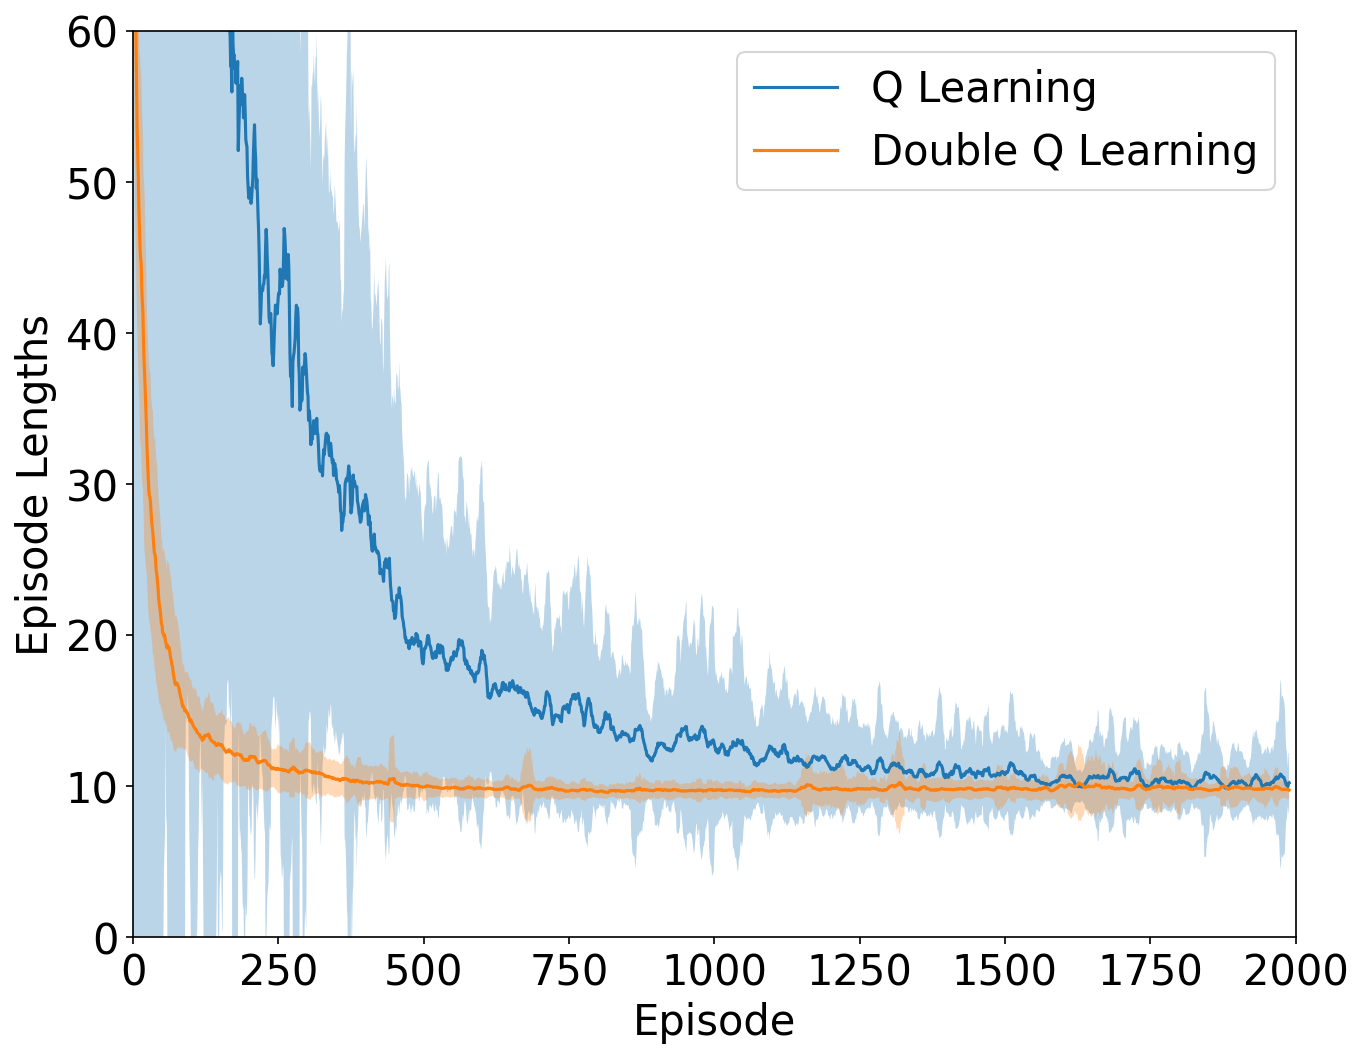

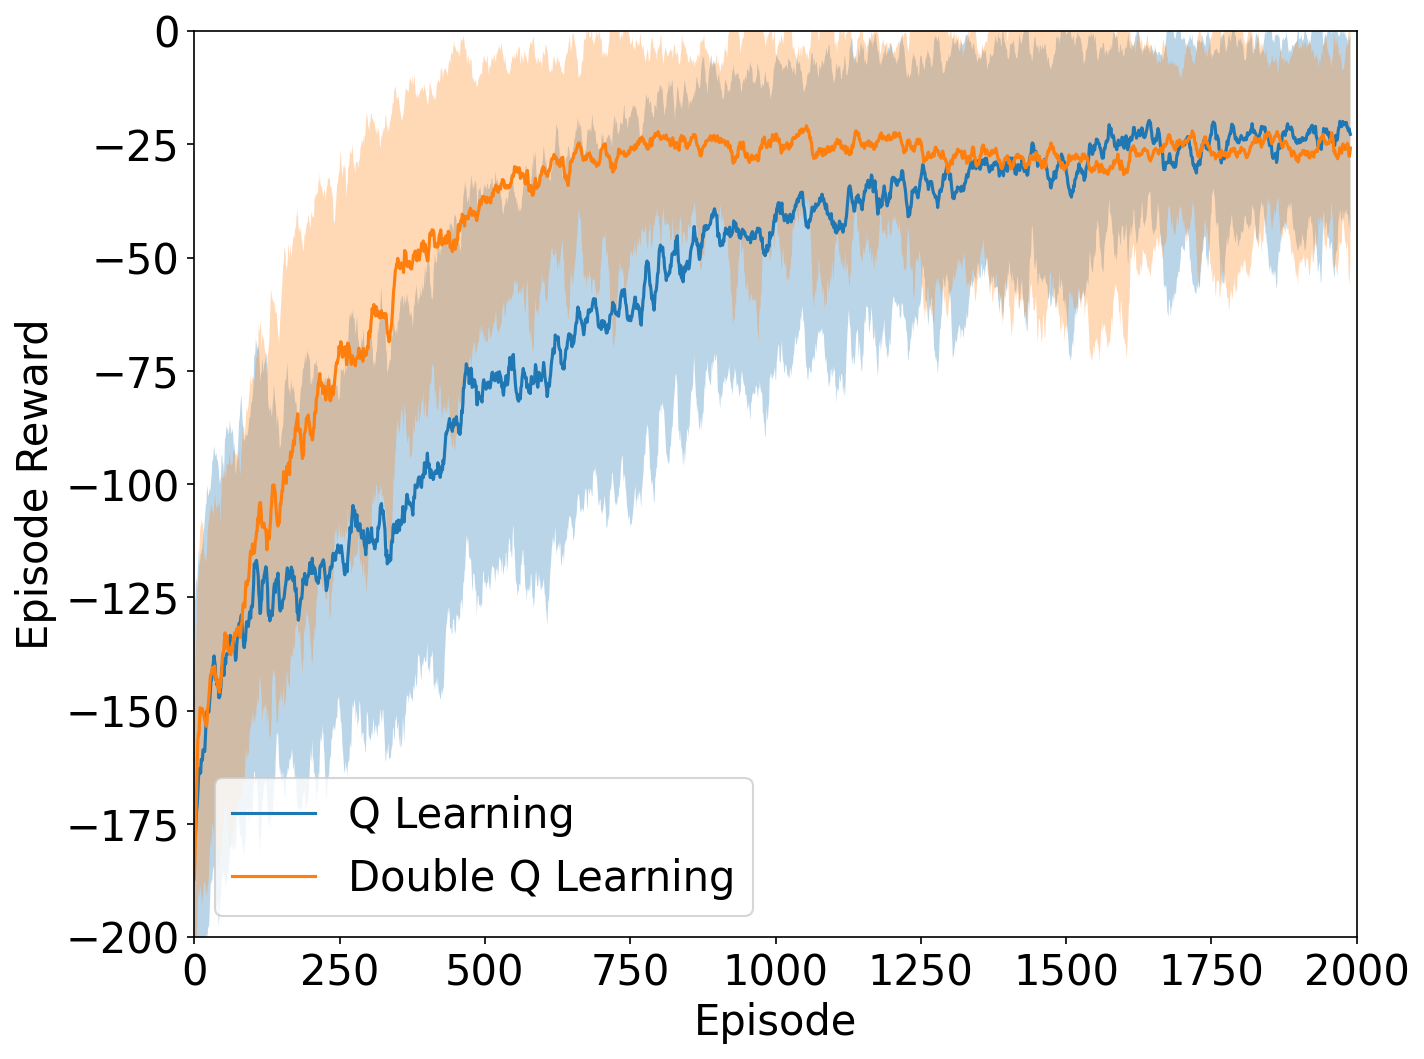

In [21]:
experiments.gridworld_test(policy_type="epsilon_greedy", epsilon=0.1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:46<00:00,  2.27s/it]


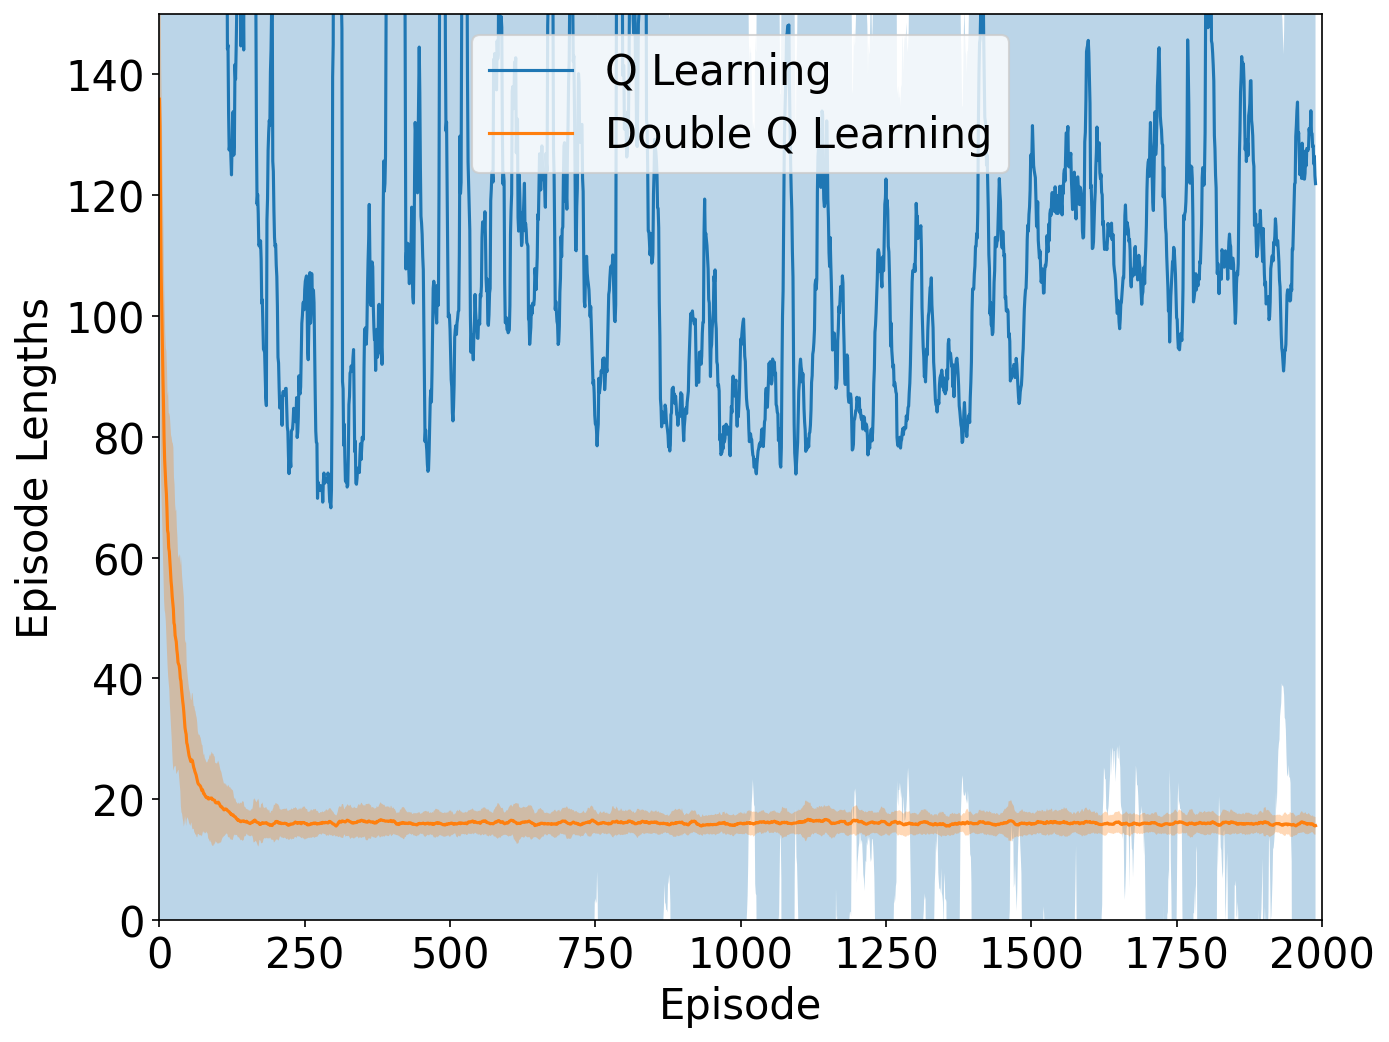

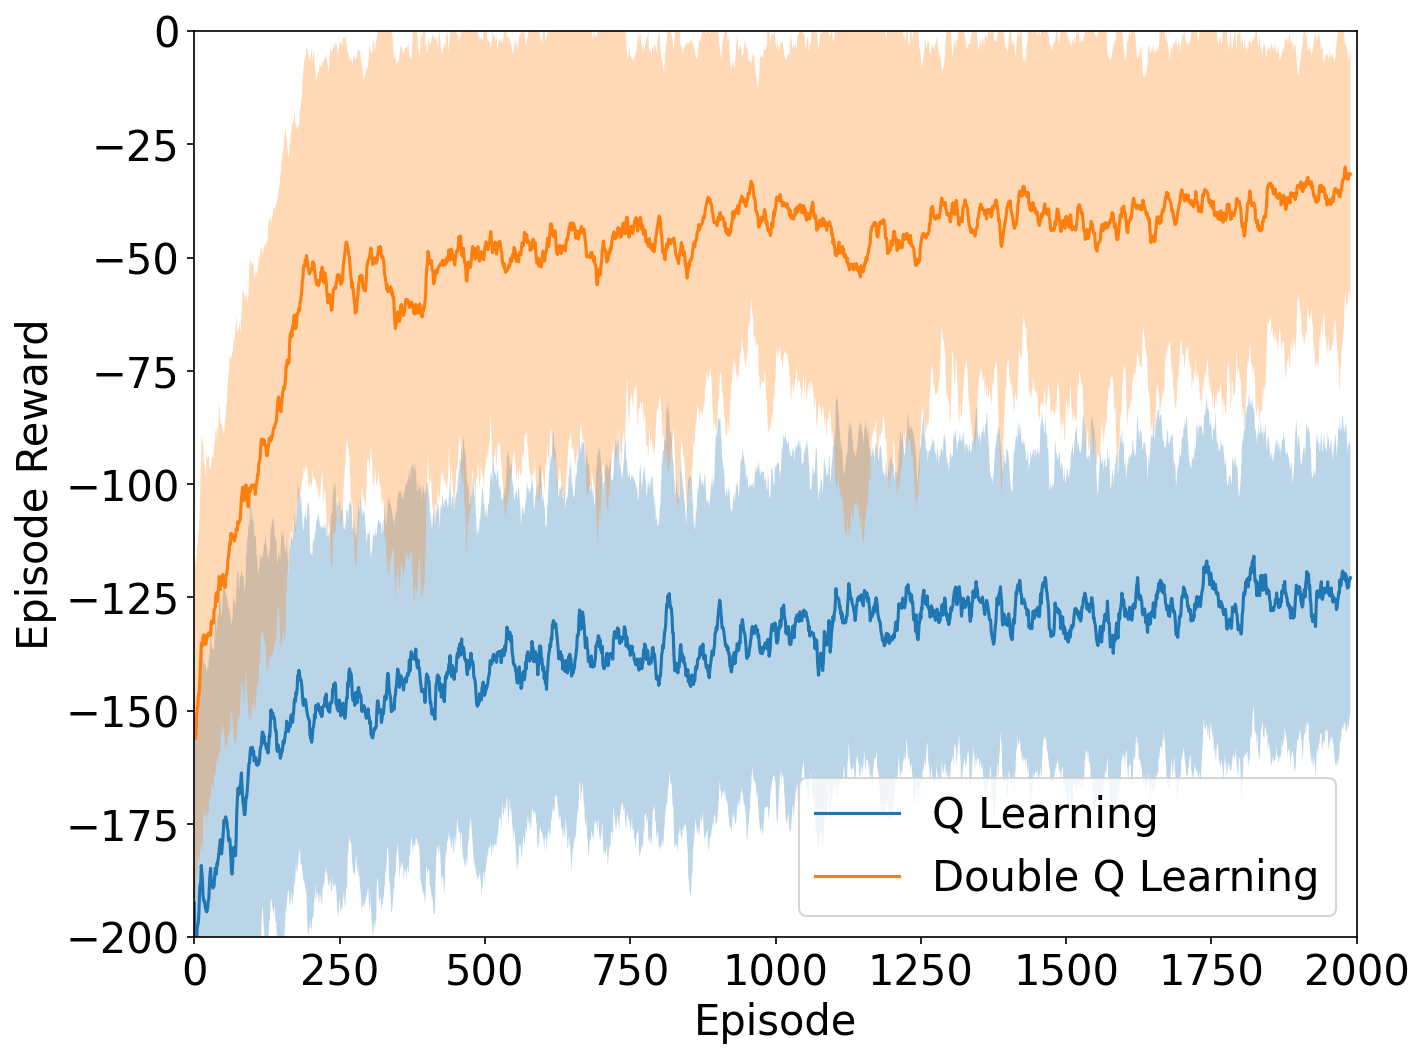

In [6]:
experiments.gridworld_test(policy_type="epsilon_greedy", epsilon=0.5, length_lim=(0, 150))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:46<00:00,  7.07s/it]


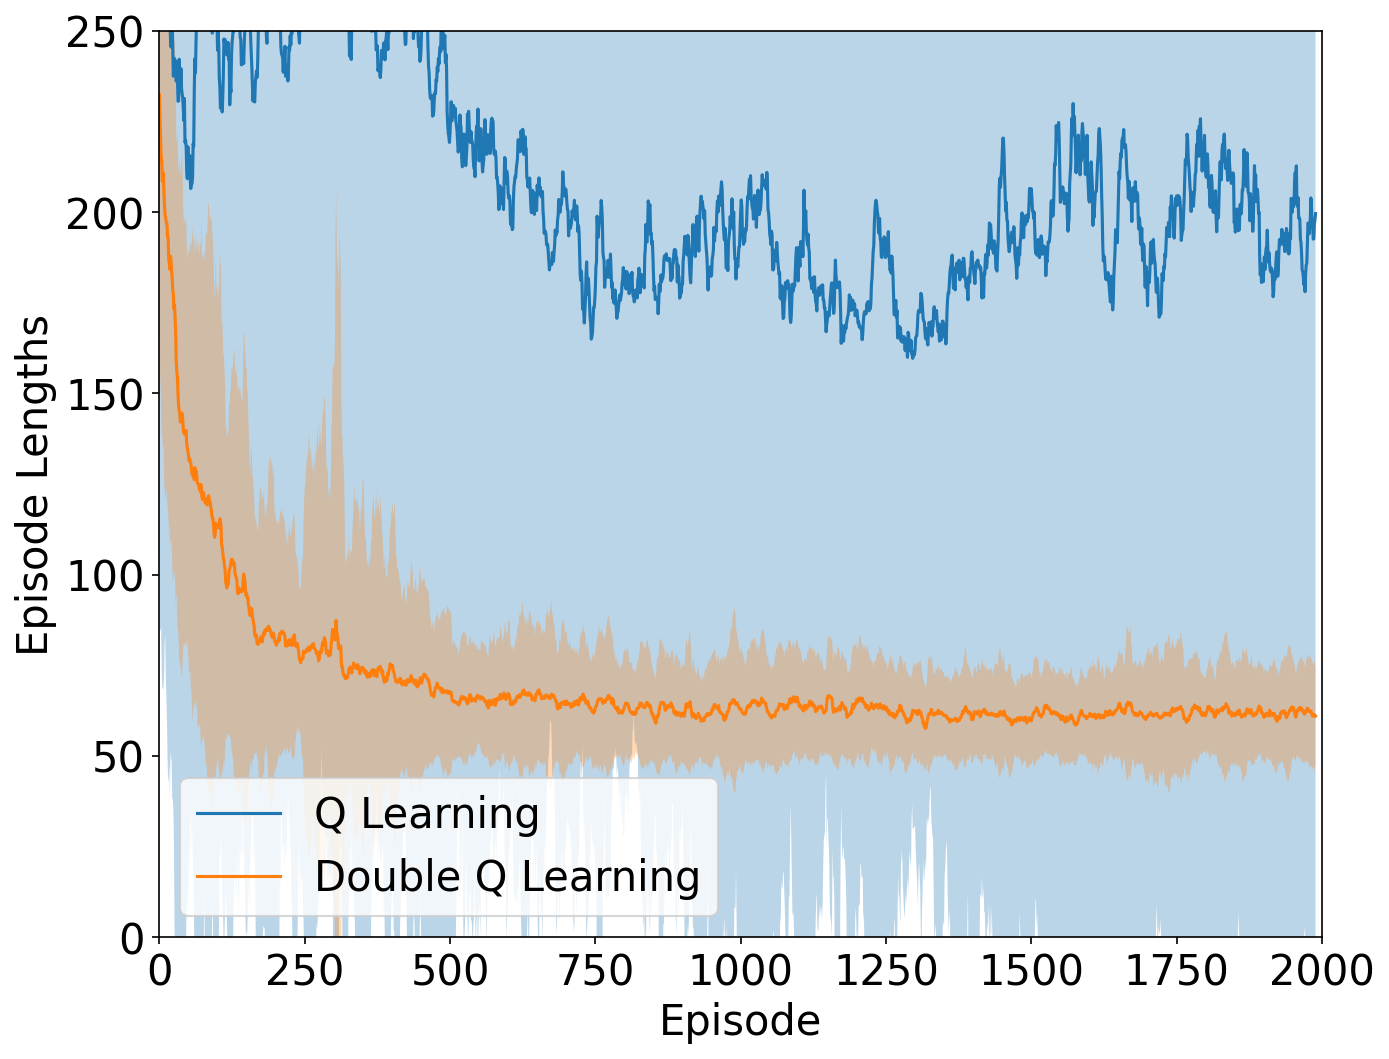

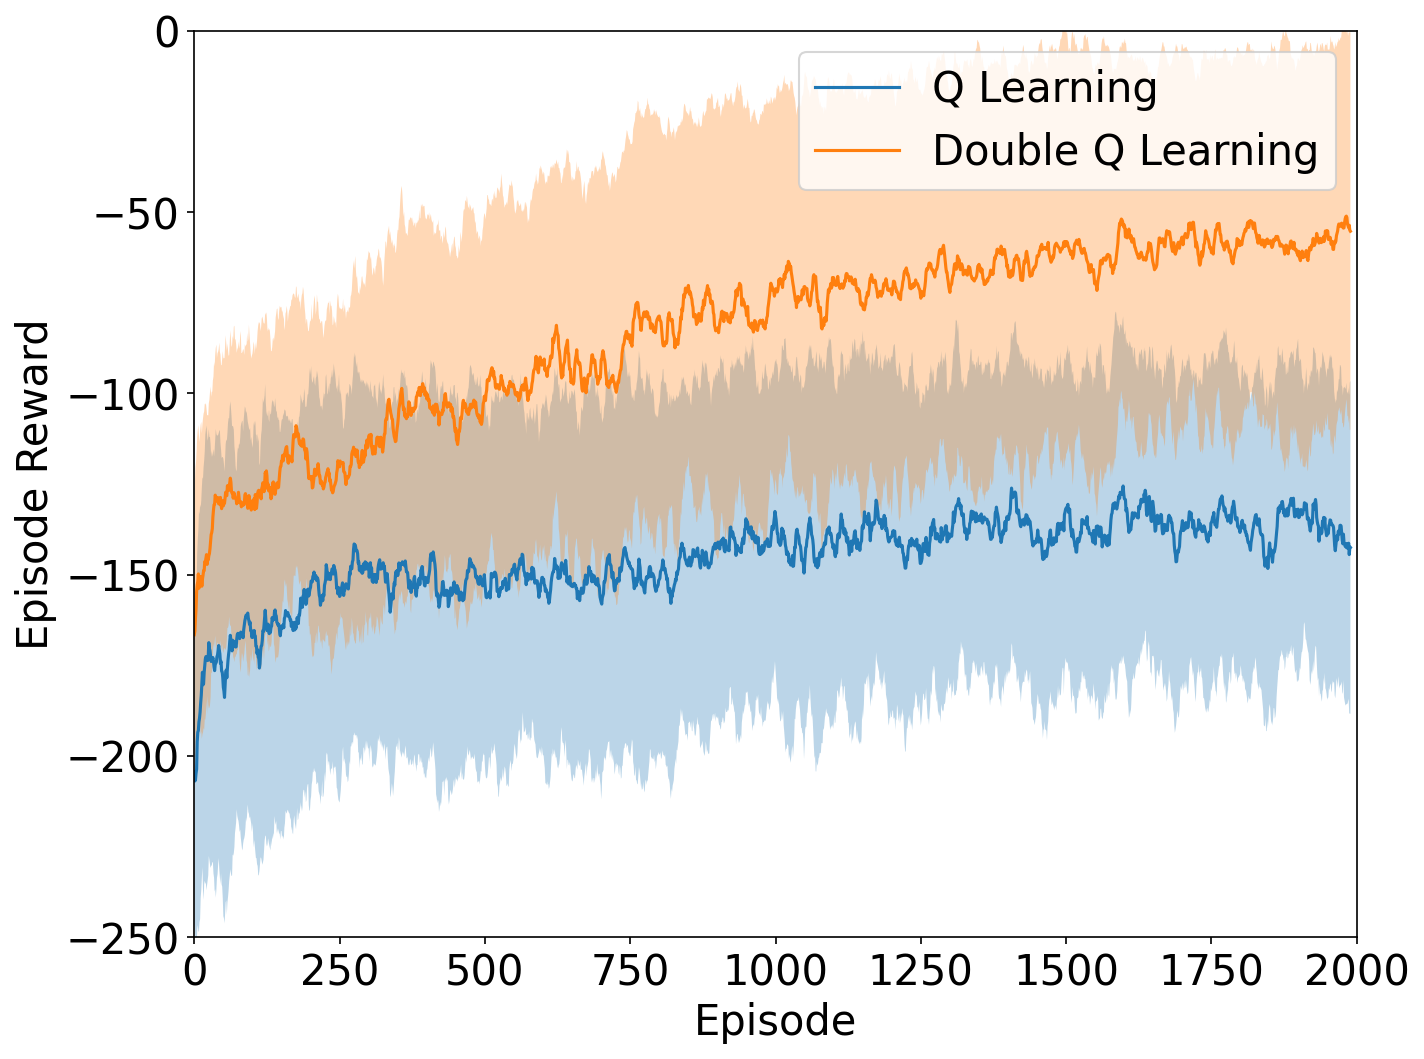

In [4]:
experiments.gridworld_test(policy_type="epsilon_greedy", epsilon=0.9, length_lim=(0, 250), reward_lim=(-250, 0))

### Softmax Policy
And finally for the Softmax policy

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:43<00:00,  2.24s/it]


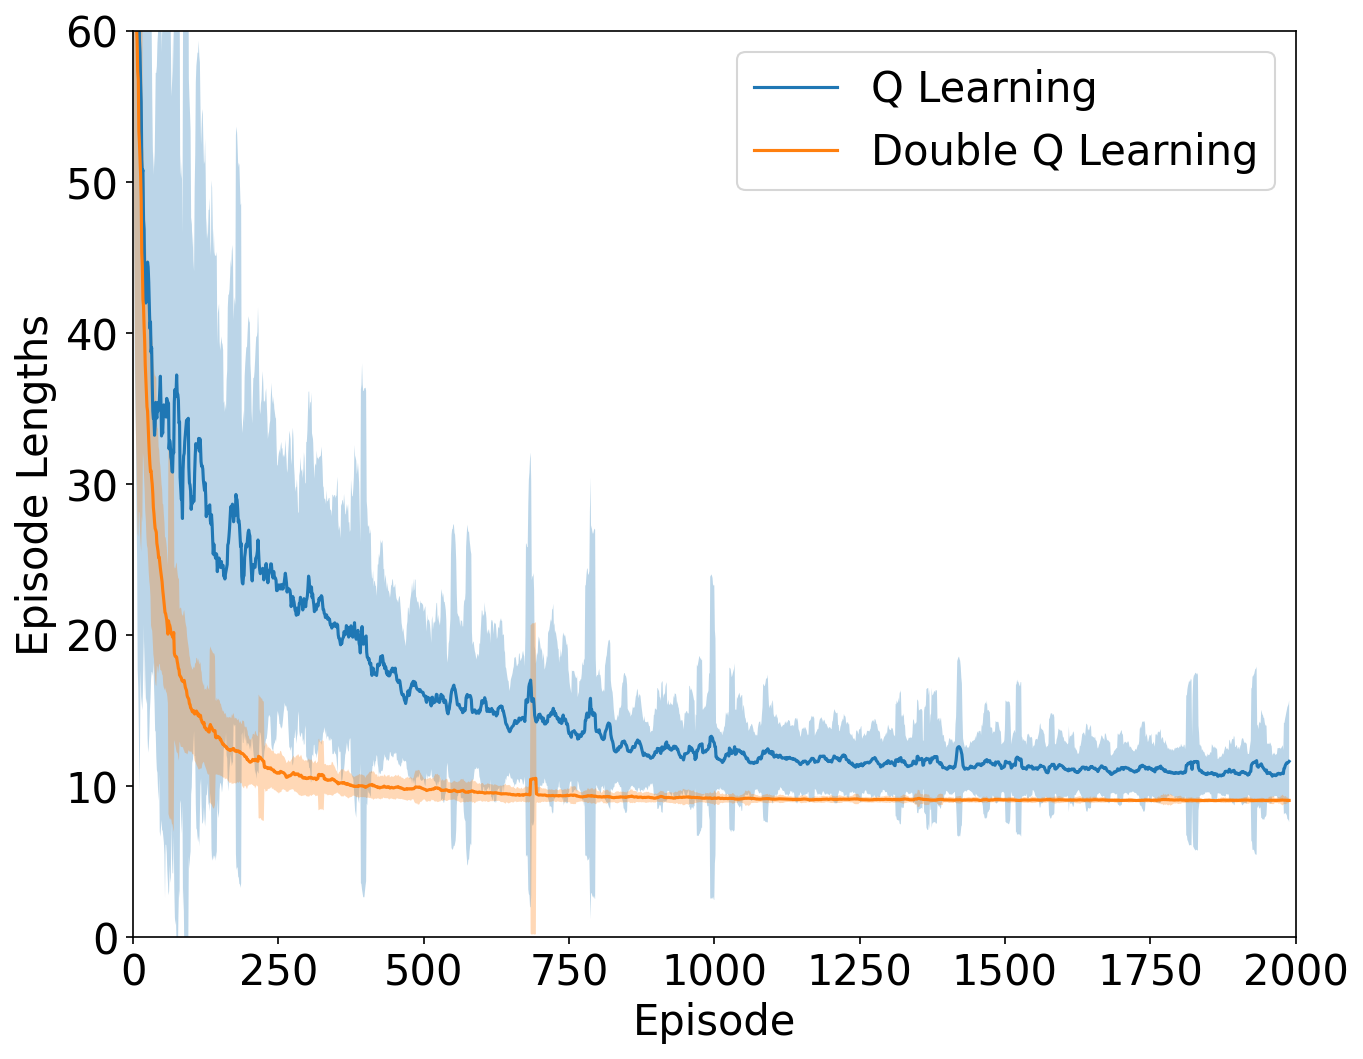

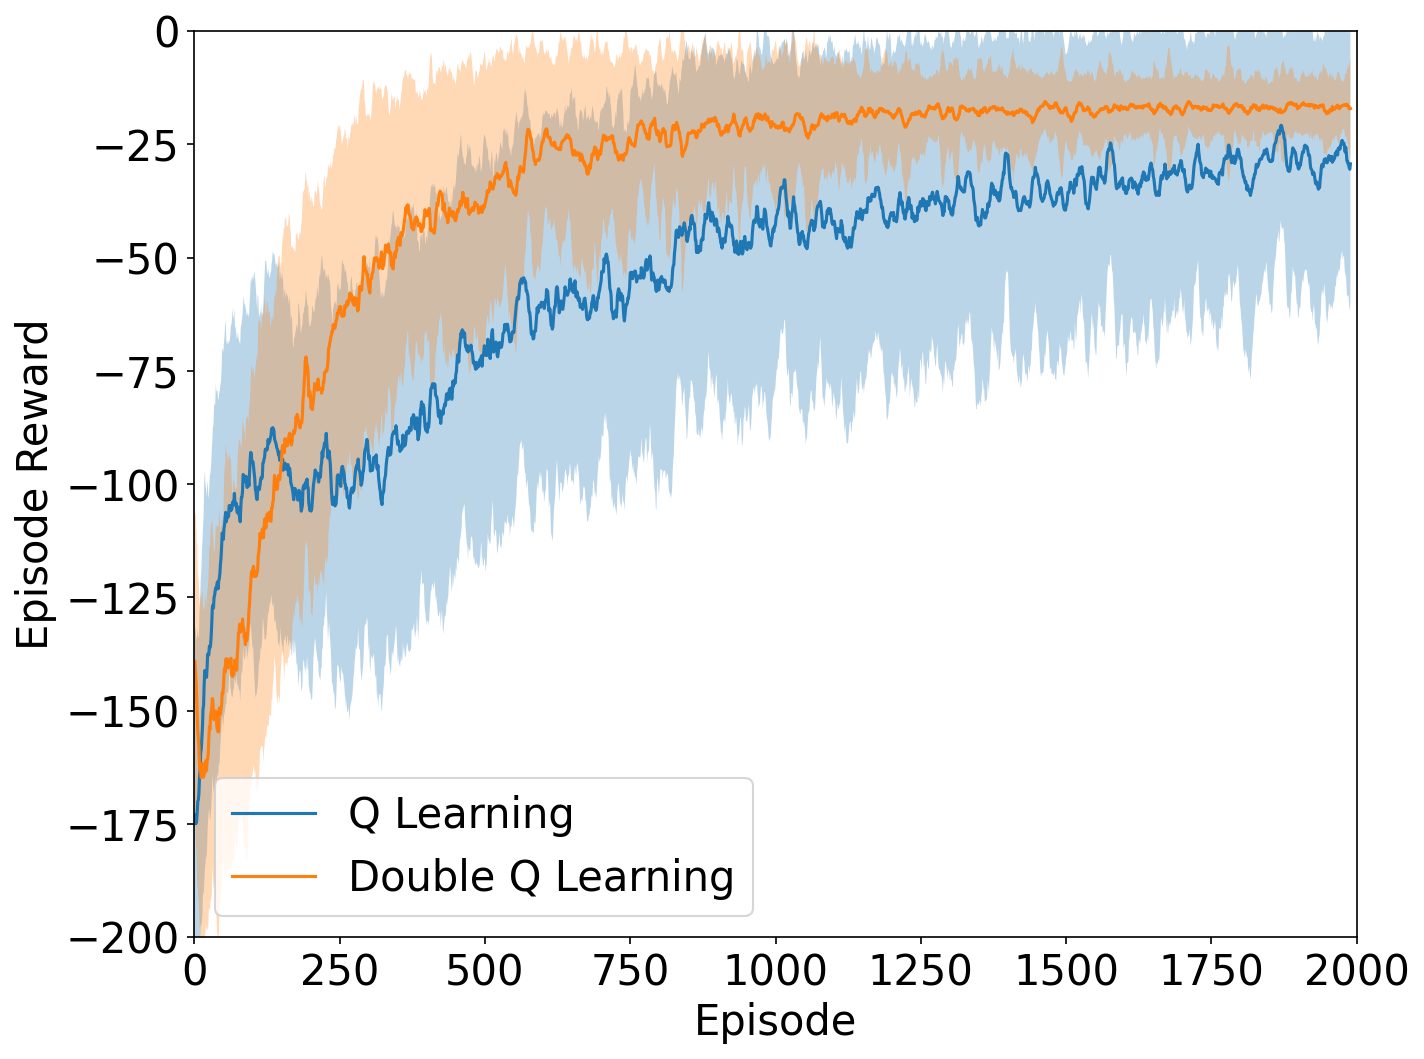

In [5]:
experiments.gridworld_test(policy_type="softmax")

## Environment tests
Next we experiment test the different environments using the baseline policy.
### Deterministic environment
First we show the results on the deterministic gridworld environment, where the rewards are constant and are increased for each subsequent row.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.54s/it]


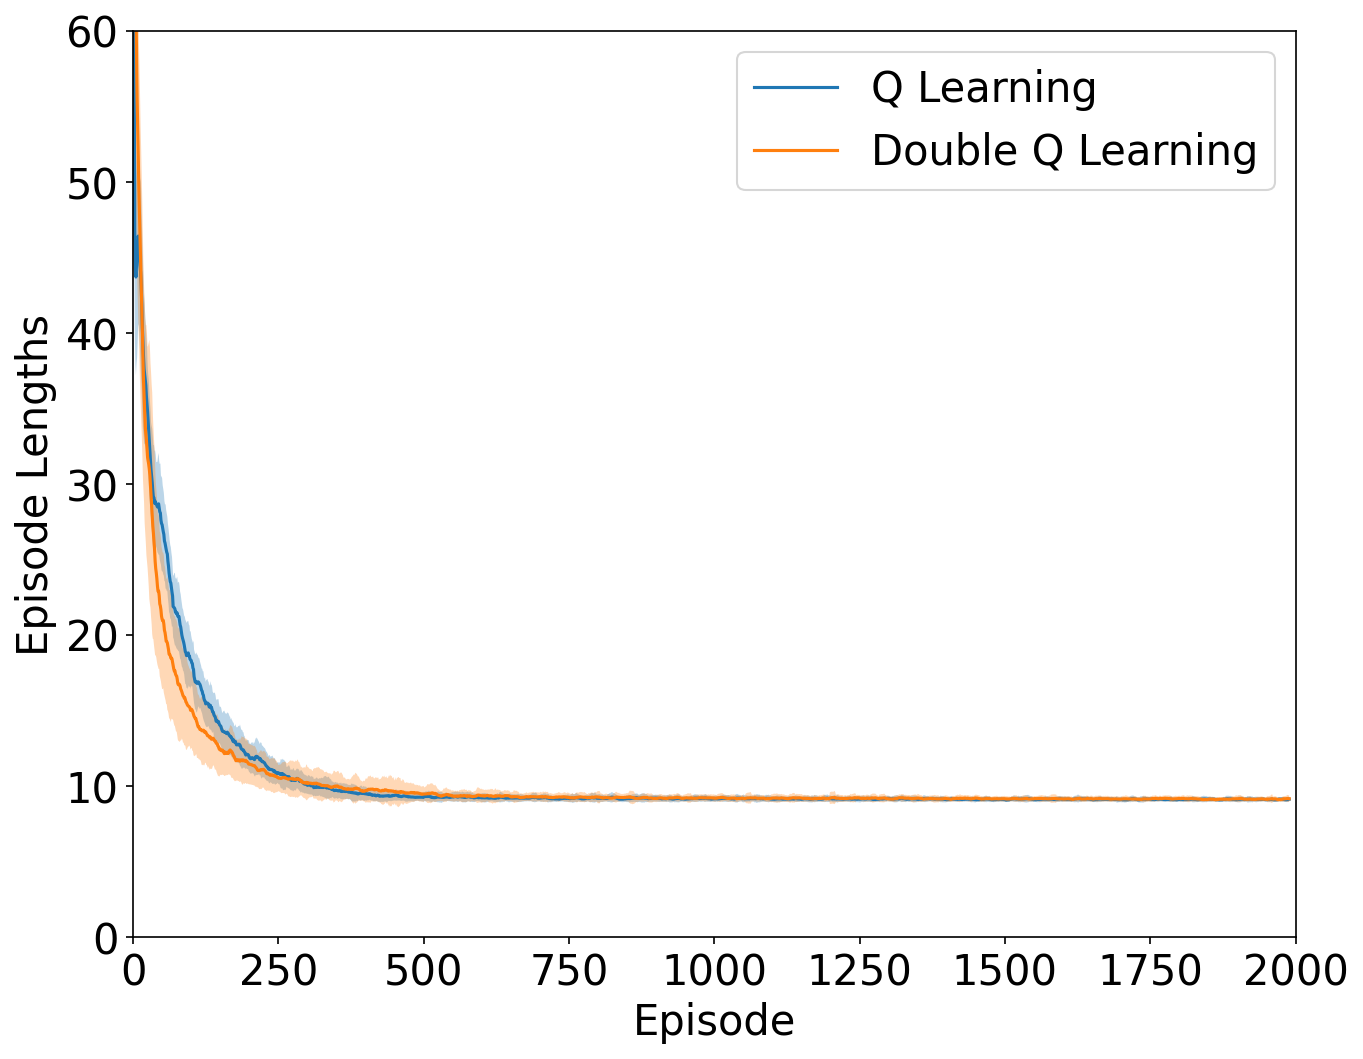

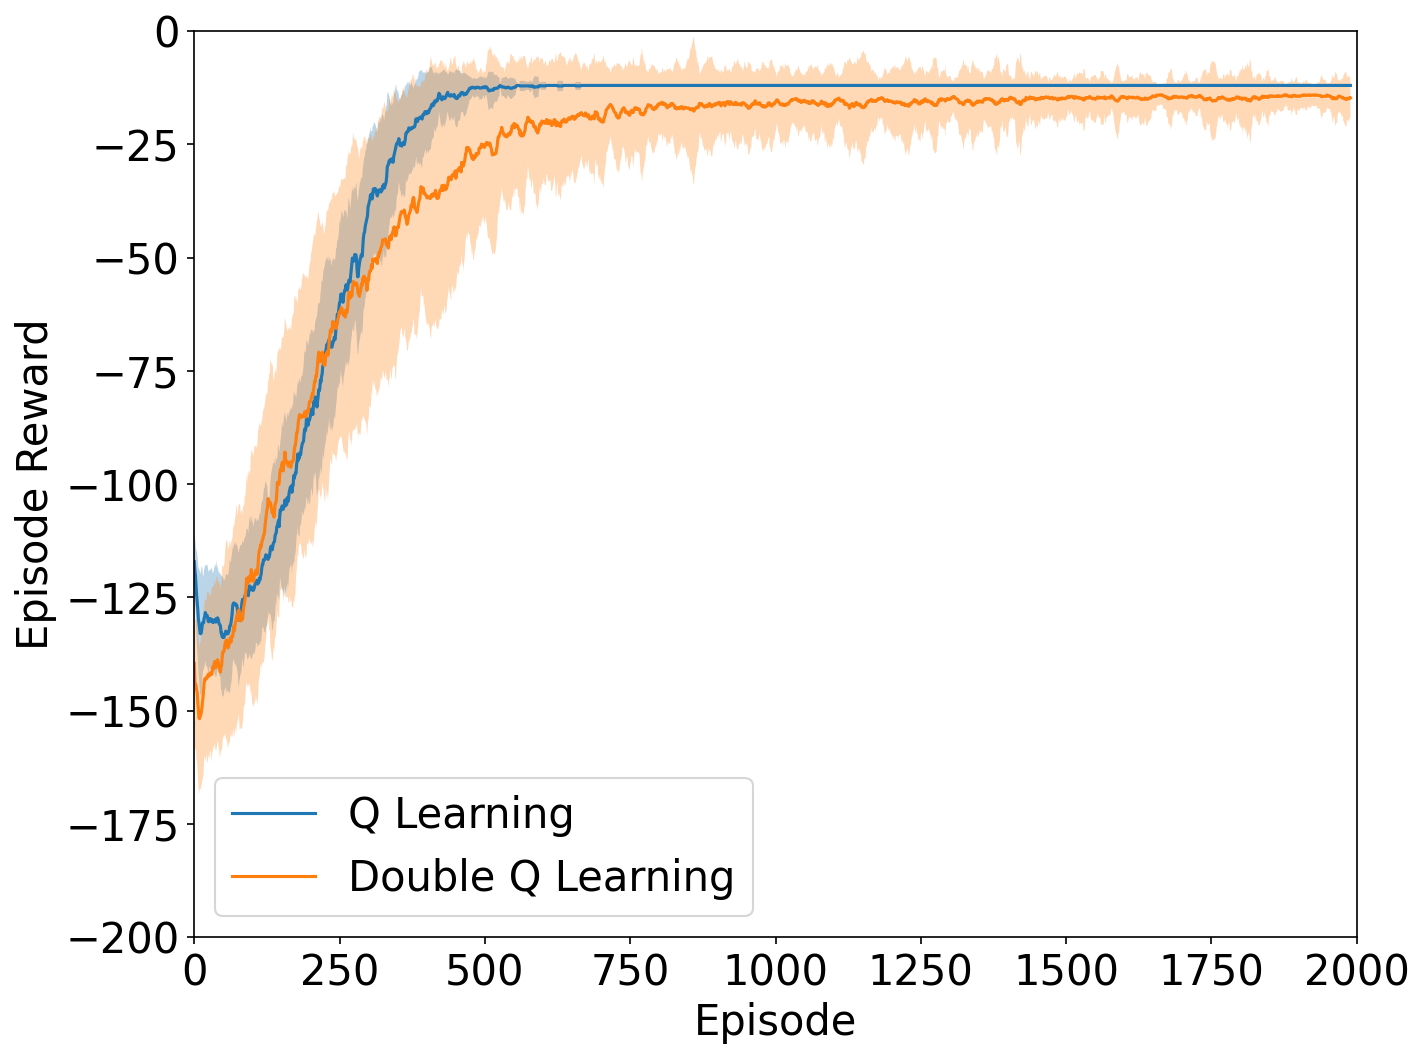

In [3]:
experiments.gridworld_test(env_type='deterministic')

### Stochastic Environment
Next on the stochastic environment, where each state yields a Gaussian distributed reward where each subsequent row increases the mean and standard deviation of the Gaussian.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [11:29<00:00,  6.90s/it]


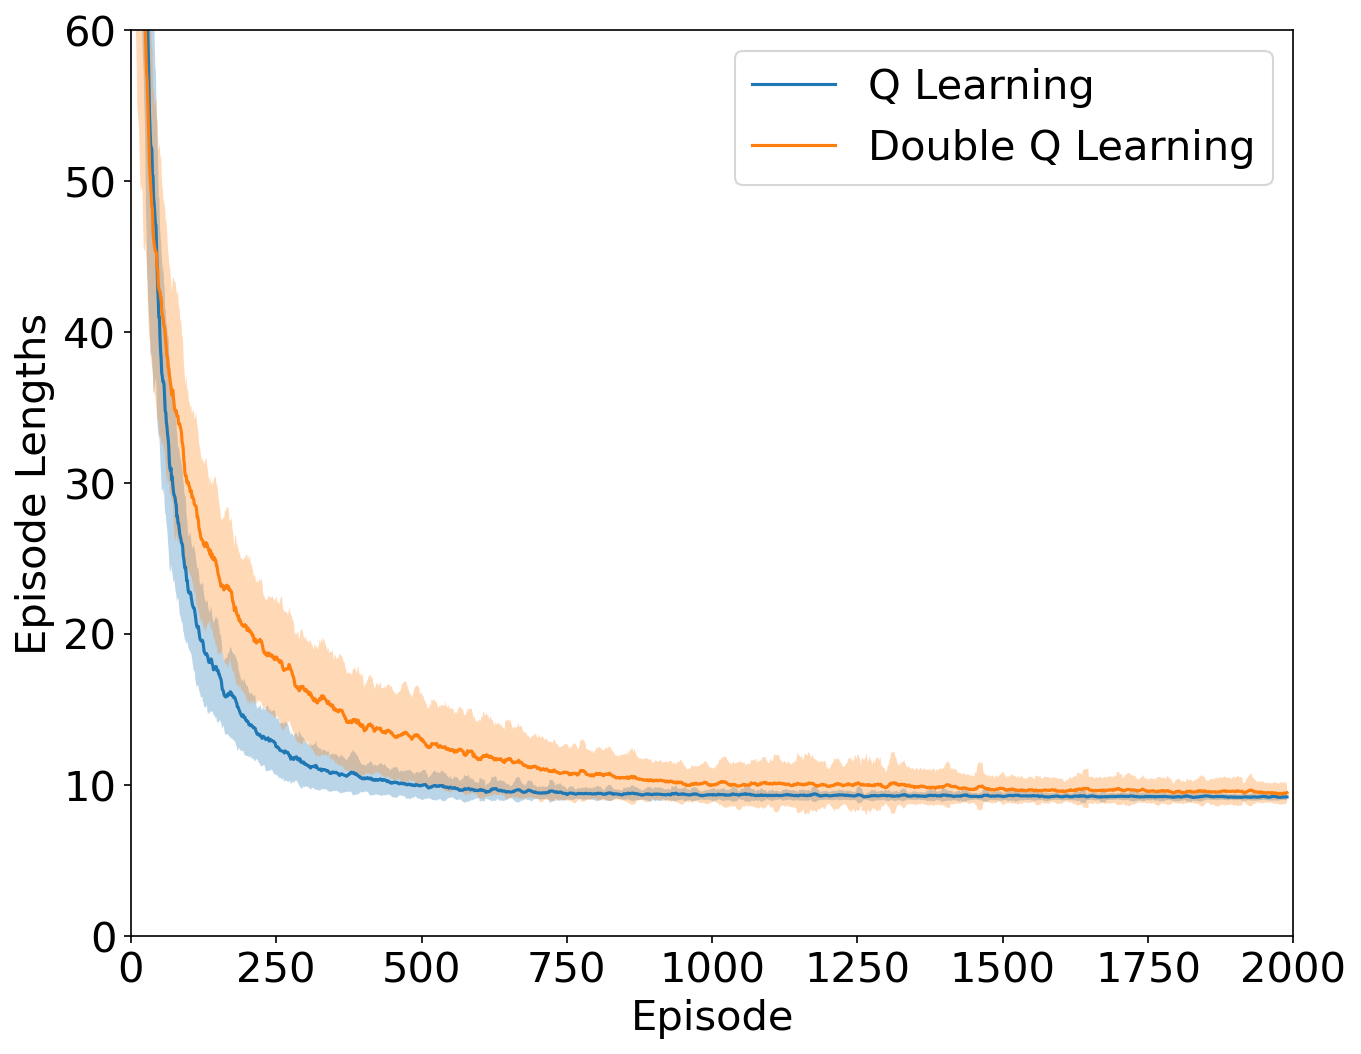

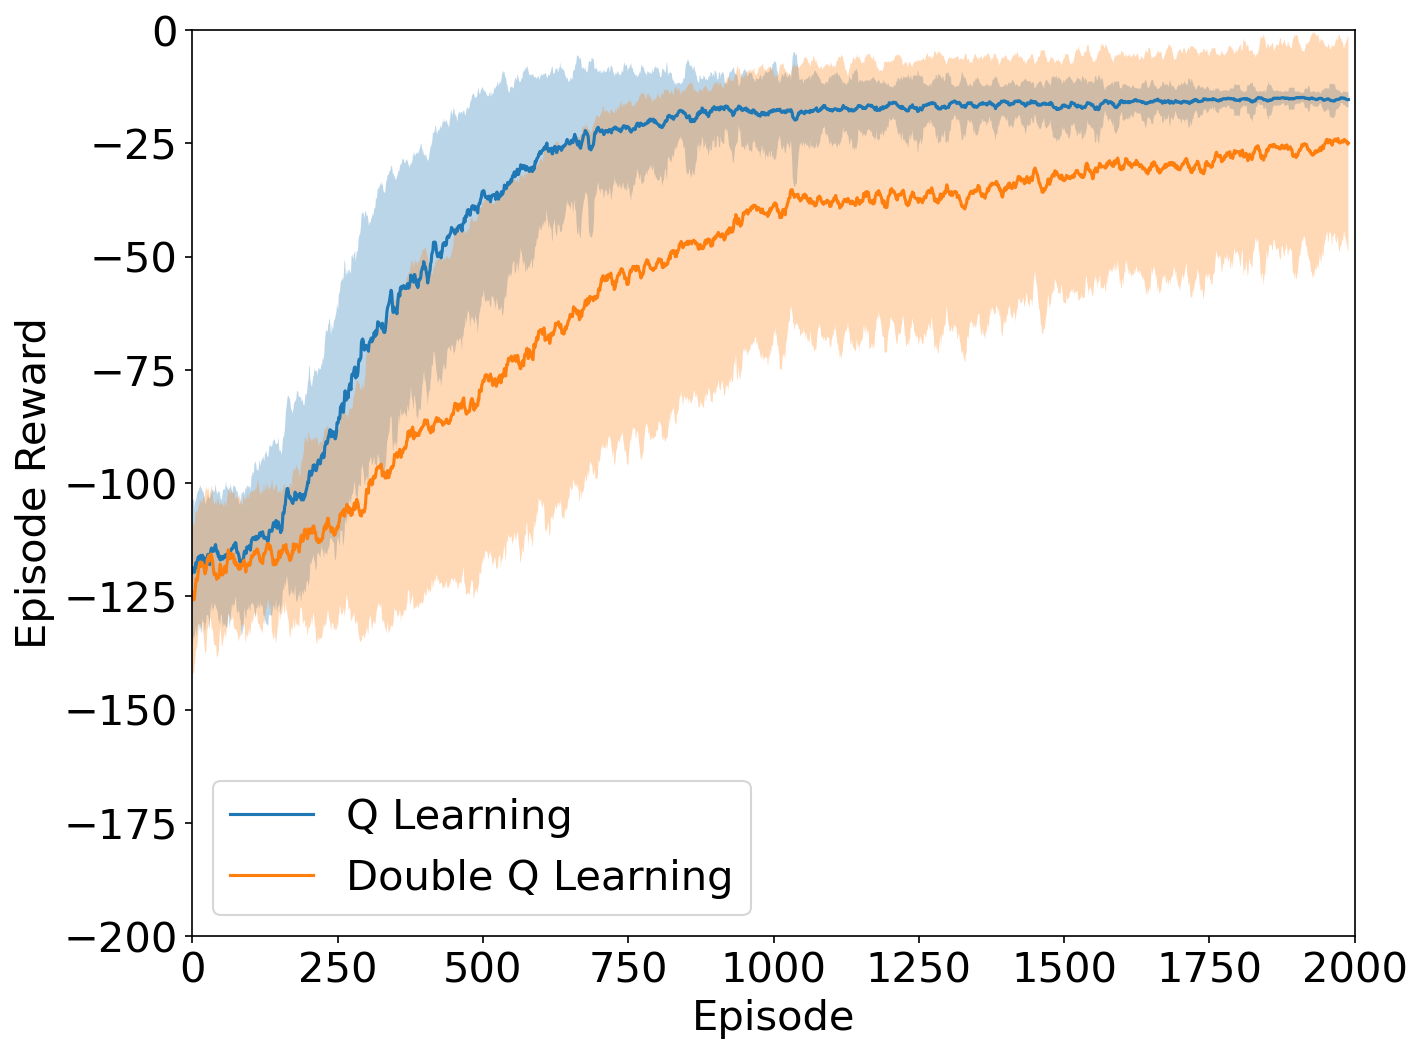

In [3]:
experiments.gridworld_test(env_type='stochastic')

### Reverse Stochastic Environment
Finally we show the results on the Reverse Stochastic environments, which is the same as the stochastic environment, except that now the means reversed. Thus the last row has the lowest negative reward and the first row the highest negative reward.

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:47<00:00,  2.87s/it]


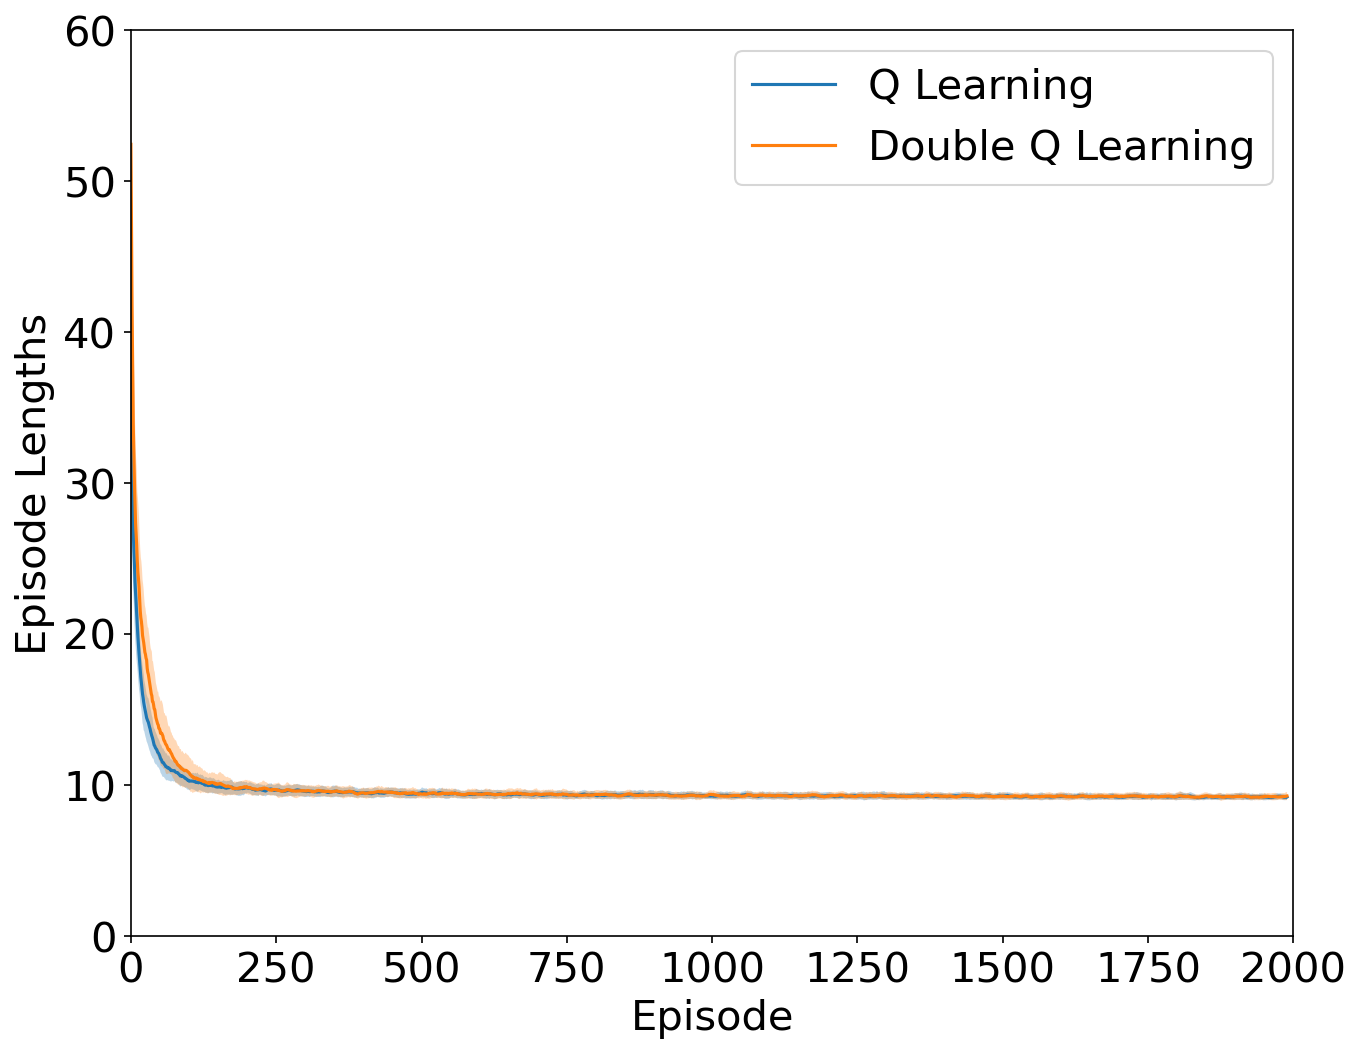

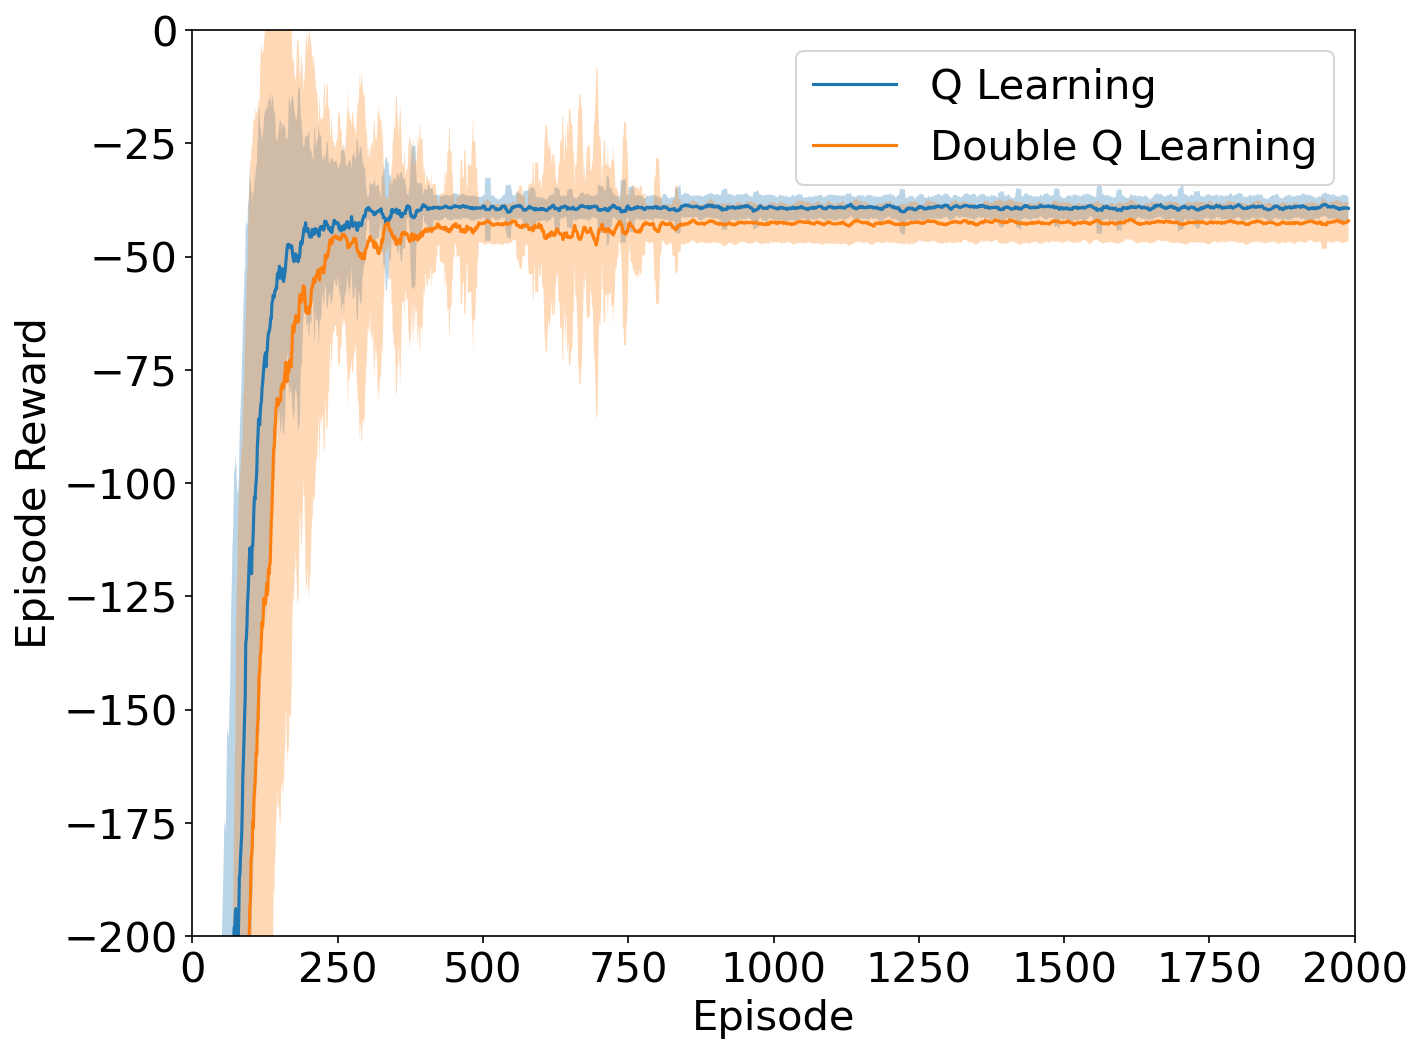

In [4]:
experiments.gridworld_test(env_type='reverse_stochastic')